# Deforestation Dataset
---
An exploratory analysis. 

LINK: https://www.kaggle.com/datasets/konradb/deforestation-dataset?resource=download

Importing libraries:

In [3107]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Importing Data:

In [3108]:
# Defining the file path:
path = 'goal15.forest_shares.csv'

# Assigning the dataframe to a variable:
df = pd.read_csv(path, delimiter=';')

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020,trend
0,AFG,1.9,1.9,0.0
1,ALB,28.1,28.8,2.5
2,DZA,0.7,0.8,14.3
3,ASM,88.7,85.7,-3.4
4,AND,34.0,34.0,0.0


## First Steps:
Removing unnecessary columns;

Renaming columns;

Checking for duplicates;

Checking data types;

Main information: mean, median, row count, minimum, and maximum.

### Removing unnecessary column

Since the "trend" column represents the percentage growth or decrease between 2020 and 2000, we will remove it. This is because it doesn't provide new information, but rather reflects a relationship between the other columns.

In [3109]:
# Removing the 'trend' column
df = df[['iso3c', 'forests_2000', 'forests_2020']]

# Preview:
df.head(5)

,iso3c,forests_2000,forests_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


### Renaming columns:

In [3110]:
# To make the understanding easier, we will rename the columns:

# Renaming:
new_names = {'iso3c': 'country', 'forests_2000': 'f_2000', 'forests_2020': 'f_2020'}
df = df.rename(columns=new_names)

# Preview:
df.head(5)

,country,f_2000,f_2020
0,AFG,1.9,1.9
1,ALB,28.1,28.8
2,DZA,0.7,0.8
3,ASM,88.7,85.7
4,AND,34.0,34.0


### Checking for Duplicates

To check for duplicates, we will first examine the dataset to identify duplicate rows. Then, we will specifically focus on the "country" column to determine the presence of duplicate country names.

In [3111]:
# Checking for duplicates in the dataset:
total_duplicates = df.duplicated().sum()
print("Total number of duplicates in the dataset: ",total_duplicates)

Total number of duplicates in the dataset:  0


In [3112]:
# Checking the duplicates in the country column:
country_duplicates = df.duplicated(subset=['country']).sum()
print("Duplicated countries: ",country_duplicates)

Duplicated countries:  0


Since the dataset does not contain any duplicated values, there is no need for data treatment.

### Checking Data Types:

In [3113]:
# Checking the data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  237 non-null    object 
 1   f_2000   237 non-null    float64
 2   f_2020   237 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.7+ KB


The data types are consistent with the expected values.

### Key Statistical Information

In [3114]:
# Key Statistical Information:
df.describe()

,f_2000,f_2020
count,237.000000,237.000000
mean,32.255274,31.585654
std,25.366225,24.744673
min,0.000000,0.000000
25%,9.900000,10.400000
50%,30.300000,30.300000
75%,50.900000,49.800000
max,98.300000,97.400000


## Enhancing the Analysis with Additional Data
Region, Subregion, Continent, and Development;

Country Area

### Region, Subregion, and Continent
To enhance the dataset visualization, I will incorporate information such as the continent's name and the full country name from the dataset:

LINK: https://datahub.io/core/country-codes#data

In [3115]:
# Defining the file path:
path2 = 'country-codes_csv.csv'

# Assigning the dataframe to a variable:
country_info = pd.read_csv(path2, delimiter=';')

# Preview:
country_info.head(5)

,FIFA,Dial,ISO3166-1-Alpha-3,MARC,is_independent,ISO3166-1-numeric,GAUL,FIPS,WMO,ISO3166-1-Alpha-2,ITU,IOC,DS,UNTERM Spanish Formal,Global Code,Intermediate Region Code,official_name_fr,UNTERM French Short,ISO4217-currency_name,Developed / Developing Countries,UNTERM Russian Formal,UNTERM English Short,ISO4217-currency_alphabetic_code,Small Island Developing States (SIDS),UNTERM Spanish Short,ISO4217-currency_numeric_code,UNTERM Chinese Formal,UNTERM French Formal,UNTERM Russian Short,M49,Sub-region Code,Region Code,official_name_ar,ISO4217-currency_minor_unit,UNTERM Arabic Formal,UNTERM Chinese Short,Land Locked Developing Countries (LLDC),Intermediate Region Name,official_name_es,UNTERM English Formal,official_name_cn,official_name_en,ISO4217-currency_country_name,Least Developed Countries (LDC),Region Name,UNTERM Arabic Short,Sub-region Name,official_name_ru,Global Name,Capital,Continent,TLD,Languages,Geoname ID,CLDR display name,EDGAR
0,TPE,886,TWN,ch,Yes,158.0,925.0,TW,NaN,TW,NaN,TPE,RC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Taipei,AS,.tw,"zh-TW,zh,nan,hak",1668284.0,Taiwan,NaN
1,AFG,93,AFG,af,Yes,4.0,1.0,AF,AF,AF,AFG,AFG,AFG,República Islámica del Afganistán (la),VERDADEIRO,NaN,Afghanistan,Afghanistan (l') [masc.],Afghani,Developing,????????? ?????????? ??????????,Afghanistan,AFN,NaN,Afganistán (el),971,?????????,République islamique d'Afghanistan,??????????,4.0,34.0,142.0,?????????,2,??????? ????????? ?????????,???,x,NaN,Afganistán,the Islamic Republic of Afghanistan,???,Afghanistan,AFGHANISTAN,x,Asia,?????????,Southern Asia,??????????,World,Kabul,AS,.af,"fa-AF,ps,uz-AF,tk",1149361.0,Afghanistan,B2
2,ALB,355,ALB,aa,Yes,8.0,3.0,AL,AB,AL,ALB,ALB,AL,la República de Albania,VERDADEIRO,NaN,Albanie,Albanie (l') [fém.],Lek,Developed,?????????? ???????,Albania,ALL,NaN,Albania,8,????????,la République d'Albanie,???????,8.0,39.0,150.0,???????,2,??????? ???????,?????,NaN,NaN,Albania,the Republic of Albania,?????,Albania,ALBANIA,NaN,Europe,???????,Southern Europe,???????,World,Tirana,EU,.al,"sq,el",783754.0,Albania,B3
3,ALG,213,DZA,ae,Yes,12.0,4.0,AG,AL,DZ,ALG,ALG,DZ,la República Argelina Democrática y Popular,VERDADEIRO,NaN,Algérie,Algérie (l') [fém.],Algerian Dinar,Developing,????????? ???????? ??????????????? ??????????,Algeria,DZD,NaN,Argelia,12,????????????,la République algérienne démocratique et popul...,?????,12.0,15.0,2.0,???????,2,????????? ????????? ??????????? ???????,?????,NaN,NaN,Argelia,the People's Democratic Republic of Algeria,?????,Algeria,ALGERIA,NaN,Africa,???????,Northern Africa,?????,World,Algiers,AF,.dz,ar-DZ,2589581.0,Algeria,B4
4,ASA,1-684,ASM,as,Territory of US,16.0,5.0,AQ,NaN,AS,SMA,ASA,USA,NaN,VERDADEIRO,NaN,Samoa américaines,NaN,US Dollar,Developing,NaN,NaN,USD,x,NaN,840,NaN,NaN,NaN,16.0,61.0,9.0,????? ?????????,2,NaN,NaN,NaN,NaN,Samoa Americana,NaN,?????,American Samoa,AMERICAN SAMOA,NaN,Oceania,NaN,Polynesia,???????????? ?????,World,Pago Pago,OC,.as,"en-AS,sm,to",5880801.0,American Samoa,B5


In [3116]:
# Defining the essential columns to merge with our initial dataset:
country_info = country_info[["ISO3166-1-Alpha-3","Developed / Developing Countries","official_name_en","Region Name","Sub-region Name"]]
country_info.head(5)

,ISO3166-1-Alpha-3,Developed / Developing Countries,official_name_en,Region Name,Sub-region Name
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [3117]:
# To enhance clarity, we will rename the columns:
#Renaming:
new_names2 = {'ISO3166-1-Alpha-3': 'country', 'Developed / Developing Countries': 'development', 'official_name_en': 'country_name', 'Region Name': 'continent', 'Sub-region Name': 'region'}
country_info = country_info.rename(columns=new_names2)

# Preview:
country_info.head(5)

,country,development,country_name,continent,region
0,TWN,NaN,NaN,NaN,NaN
1,AFG,Developing,Afghanistan,Asia,Southern Asia
2,ALB,Developed,Albania,Europe,Southern Europe
3,DZA,Developing,Algeria,Africa,Northern Africa
4,ASM,Developing,American Samoa,Oceania,Polynesia


In [3118]:
# Merging dataframes:

dataframe = pd.merge(df, country_info, on='country', how='inner', indicator=True)


# Preview:
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,_merge
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,both
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,both
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,both
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,both
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,both


In [3119]:
# Verifying if all countries have been successfully merged:
dataframe.describe()

,f_2000,f_2020
count,236.000000,236.000000
mean,32.256780,31.587288
std,25.420128,24.797253
min,0.000000,0.000000
25%,9.875000,10.275000
50%,29.950000,30.200000
75%,51.200000,49.875000
max,98.300000,97.400000


Through the examination and comparison of the results between the .info() output of the original dataset and the .info() output of the merged dataset, it becomes evident that a row is missing. We will delve deeper into this matter in the subsequent lines of code.

In [3120]:
# Identify rows in the 'df' dataframe where the 'country' column value is not present:
missing_row = df[~df['country'].isin(dataframe['country'])]

# Print the message:
print("Missing row:")

# Print the rows:
print(missing_row)


Missing row:
    country  f_2000  f_2020
233     WLD    31.9    31.2


Since the country names in the first dataset are based on the ISO 3116 country codes, we will refer to the official ISO website to obtain these codes. By visiting https://www.iso.org/iso-3166-country-codes.html and following the first link to a search site, which is https://www.iso.org/obp/ui/#search, we attempted to search for 'WLD'. Unfortunately, no results were found.

Given this, we can conclude that the first dataset contains an outlier. Since the Kaggle page doesn't mention this case and it's not listed on the official ISO 3166 website, we can safely remove it from our analysis.

In [3121]:
# Dropping the merged column:
dataframe = dataframe.drop('_merge', axis=1)

# Preview:
dataframe.head(3)

,country,f_2000,f_2020,development,country_name,continent,region
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa


### Country Area
To supplement the dataset with this information, I obtained the dataset from the organization's website:

https://data.worldbank.org/indicator/AG.LND.TOTL.K2?name_desc=false

The organization provides authentic global statistics.

Outside the current EDA, I processed the data to keep only countries in the dataset.

In [3122]:
# Defining the file path:
path3 = 'country-area.csv'

# Assigning the dataframe to a variable:
country_area = pd.read_csv(path3, sep=';')


# Preview:
country_area.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,Land area (sq. km),AG.LND.TOTL.K2,0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,180.0,0,0
1,Afghanistan,AFG,Land area (sq. km),AG.LND.TOTL.K2,0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,652230.0,0,0
2,Angola,AGO,Land area (sq. km),AG.LND.TOTL.K2,0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,1246700.0,0,0
3,Albania,ALB,Land area (sq. km),AG.LND.TOTL.K2,0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,27400.0,0,0
4,Andorra,AND,Land area (sq. km),AG.LND.TOTL.K2,0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,470.0,0,0


The dataset provides area data since 1960. We will utilize the most recent year with NaN values accounting for less than 5% of the dataset's length, and, if it's possible, the year of 2000.

In [3123]:
# Threshold for NaN values:

threshold = len(country_area)*0.05

# Preview:
print('The NaN values threshold is: ',threshold)

The NaN values threshold is:  10.25


In [3124]:
# Identifying NaN Values by Columns:

country_area['2000'].isna().sum()

0

We will take the same area (2000) as a basis for our analysis to compare forest percentage. As verified, the missing area values are below 5% for this year, which falls within an acceptable limit.

In [3125]:
# Organizing the area dataset:
country_area = country_area[['Country Code', '2000','Indicator Name']]

# Renaming
new_names3 = {'Country Code': 'country', '2000': 'area_country_2000','Indicator Name':'indicator'}
country_area = country_area.rename(columns=new_names3)

#Preview
country_area.head(5)

,country,area_country_2000,indicator
0,ABW,180.0,Land area (sq. km)
1,AFG,652230.0,Land area (sq. km)
2,AGO,1246700.0,Land area (sq. km)
3,ALB,27400.0,Land area (sq. km)
4,AND,470.0,Land area (sq. km)


Since not all countries have area data, the merge will not be an inner join:

In [3126]:
# Merging the dataframes:
dataframe = pd.merge(dataframe, country_area, on='country', how='left')

# Preview:
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,Land area (sq. km)
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,Land area (sq. km)
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381740.0,Land area (sq. km)
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0,Land area (sq. km)
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0,Land area (sq. km)


We will check the countries with missing values.

In [3127]:
missing_values_by_continent = dataframe.groupby('continent').apply(lambda x: x.isna().sum())
missing_values_by_continent

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator
continent,,,,,,,,,
Africa,0,0,0,0,0,0,0,7,7
Americas,0,0,0,0,0,0,0,12,12
Asia,0,0,0,0,0,0,0,2,2
Europe,0,0,0,0,0,0,0,4,4
Oceania,0,0,0,0,0,0,0,8,8


In [3128]:
# Filter the DataFrame to select rows with null values in 'area_country_2000' column
missing_area_countries = country_area[country_area['area_country_2000'].isnull()]

# Extract and print 'Country' and 'Country Name' columns for the missing area countries
for index, row in missing_area_countries.iterrows():
    print("Country:", row['Country'], "Country Name:", row['Country Name'])

In [3129]:
#Converting the area type:

dataframe['area_country_2000'] = dataframe['area_country_2000'].astype(float)
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,Land area (sq. km)
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,Land area (sq. km)
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381740.0,Land area (sq. km)
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0,Land area (sq. km)
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0,Land area (sq. km)


The countries that do not have an area will have the data manually inserted as follows:

In [3130]:
data = {
    'country': ['AIA', 'BES', 'COK', 'FLK', 'GUF', 'GLP', 'GGY', 'VAT', 'JEY', 'MTQ', 'MYT', 'MSR', 'NIU', 'NFK', 'PCN', 'REU', 'BLM', 'SHN', 'SPM', 'SJM', 'TKL', 'VEN', 'WLF', 'ESH'],
    'area': [102, 328, 236, 12173, 83846, 1628, 78, 0, 120, 1128, 374, 102, 261, 34, 47, 2512, 21, 420, 242, 62045, 10, 916445, 142, 266000]
}

complete_areas = pd.DataFrame(data)

print(complete_areas.head(2))


  country  area
0     AIA   102
1     BES   328


In [3131]:
# Merging the dataframes:
dataframe = pd.merge(dataframe, complete_areas, on='country', how='left')

# Preview:
dataframe.head(5)

c:\ProgramData\anaconda3\lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator,area
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,Land area (sq. km),NaN
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,Land area (sq. km),NaN
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381740.0,Land area (sq. km),NaN
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0,Land area (sq. km),NaN
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0,Land area (sq. km),NaN


In [3132]:
# Checking:
anguilla_row = dataframe.loc[dataframe['country'] == 'AIA']
anguilla_row

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator,area
6,AIA,61.1,61.1,Developing,Anguilla,Americas,Latin America and the Caribbean,NaN,NaN,102.0


In [3133]:
# Fill column area_country_2000 with values from area column where they are empty
dataframe['area_country_2000'].fillna(dataframe['area'], inplace=True)

#dataframe = dataframe.drop(columns=['area'])
dataframe.head(2)

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator,area
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,Land area (sq. km),NaN
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,Land area (sq. km),NaN


In [3134]:
# Checking again ;) 
anguilla_row = dataframe.loc[dataframe['country'] == 'AIA']
anguilla_row

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator,area
6,AIA,61.1,61.1,Developing,Anguilla,Americas,Latin America and the Caribbean,102.0,NaN,102.0


In [3135]:
# Since we have inserted the area values in the 2000 area column, we will now delete the area column:
dataframe = dataframe.drop(columns=['area'])

In [3136]:
# Checking the dataframe lenght:
len(dataframe)

236

Checking the forests areas in square kilometers [sq.km]:

In [3137]:
# Checking the column types for operations:
dataframe.dtypes

country               object
f_2000               float64
f_2020               float64
development           object
country_name          object
continent             object
region                object
area_country_2000    float64
indicator             object
dtype: object

In [3138]:
# Calculating absolute forest area:
dataframe['2000_sqkm'] = (dataframe['f_2000']*dataframe['area_country_2000'])/100
dataframe['2020_sqkm'] = (dataframe['f_2020']*dataframe['area_country_2000'])/100

# Preview:
dataframe.head(5)

,country,f_2000,f_2020,development,country_name,continent,region,area_country_2000,indicator,2000_sqkm,2020_sqkm
0,AFG,1.9,1.9,Developing,Afghanistan,Asia,Southern Asia,652230.0,Land area (sq. km),12392.37,12392.37
1,ALB,28.1,28.8,Developed,Albania,Europe,Southern Europe,27400.0,Land area (sq. km),7699.40,7891.20
2,DZA,0.7,0.8,Developing,Algeria,Africa,Northern Africa,2381740.0,Land area (sq. km),16672.18,19053.92
3,ASM,88.7,85.7,Developing,American Samoa,Oceania,Polynesia,200.0,Land area (sq. km),177.40,171.40
4,AND,34.0,34.0,Developed,Andorra,Europe,Southern Europe,470.0,Land area (sq. km),159.80,159.80


In [3139]:
# Having a overview by continent:
sum_by_continent = dataframe.groupby('continent')[['area_country_2000','2000_sqkm', '2020_sqkm','f_2000','f_2020']].sum()
sum_by_continent

,area_country_2000,2000_sqkm,2020_sqkm,f_2000,f_2020
continent,,,,,
Africa,26938717.00,5.398139e+06,4.833277e+06,1712.8,1562.9
Americas,38431880.00,1.660901e+07,1.585144e+07,2170.9,2112.8
Asia,30985279.00,5.815287e+06,6.165941e+06,1148.5,1128.5
Europe,22202120.16,1.004631e+07,1.020396e+07,1369.8,1443.5
Oceania,8482180.00,1.834316e+06,1.847178e+06,1210.6,1206.9


In [3140]:
# Reordering columns:
dataframe = dataframe[['country','country_name','development','region','continent','2000_sqkm','f_2000','2020_sqkm','f_2020']]

# Preview
dataframe.head(3)

,country,country_name,development,region,continent,2000_sqkm,f_2000,2020_sqkm,f_2020
0,AFG,Afghanistan,Developing,Southern Asia,Asia,12392.37,1.9,12392.37,1.9
1,ALB,Albania,Developed,Southern Europe,Europe,7699.40,28.1,7891.20,28.8
2,DZA,Algeria,Developing,Northern Africa,Africa,16672.18,0.7,19053.92,0.8


Now, the dataset is prepared for analysis!

## Gaining Deeper Insights into the Dataset

### Describing the columns:

In [3141]:
dataframe.columns

Index(['country', 'country_name', 'development', 'region', 'continent',
       '2000_sqkm', 'f_2000', '2020_sqkm', 'f_2020'],
      dtype='object')

Quickly describing the dataset, it has the following columns:

'country' -> Abbreviation of the country name.

'country_name' -> Full name of the country.

'development' -> Whether the country is developed or developing.

'region' -> Region of the globe where the country is located.

'continent' -> Continent of the country.

'2000_sqkm' -> Forest area in the country in 2000.

'f_2000' -> Percentage of forest area in the country, in 2000, compared to the total area.

'2020_sqkm' -> Forest area in the country in 2020.

'f_2020' -> Percentage of forest area in the country, in 2020, compared to the total area.


### Class Frequency

Categorical values info

In [3142]:
# Development:
dataframe['development'].value_counts()

Developing    175
Developed      61
Name: development, dtype: int64

In [3143]:
# Region:
dataframe['region'].value_counts()

Sub-Saharan Africa                 51
Latin America and the Caribbean    50
Western Asia                       18
Southern Europe                    16
Northern Europe                    15
South-eastern Asia                 11
Eastern Europe                     10
Polynesia                          10
Southern Asia                       9
Western Europe                      9
Northern Africa                     7
Micronesia                          7
Northern America                    5
Eastern Asia                        5
Melanesia                           5
Central Asia                        5
Australia and New Zealand           3
Name: region, dtype: int64

In [3144]:
# Continent:
dataframe['continent'].value_counts()

Africa      58
Americas    55
Europe      50
Asia        48
Oceania     25
Name: continent, dtype: int64

### General information:

In [3145]:
# Numeric value information:
dataframe.describe()

,2000_sqkm,f_2000,2020_sqkm,f_2020
count,2.260000e+02,236.000000,2.260000e+02,236.000000
mean,1.756773e+05,32.256780,1.721318e+05,31.587288
std,7.344334e+05,25.420128,7.253493e+05,24.797253
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3.232650e+02,9.875000,2.964592e+02,10.275000
50%,1.235903e+04,29.950000,1.238924e+04,30.200000
75%,8.263581e+04,51.200000,8.046887e+04,49.875000
max,8.092382e+06,98.300000,8.157907e+06,97.400000


In [3146]:
# The shape of the dataset:
dataframe.shape

(236, 9)

## Country and Region with the Highest Deforestation in 20 Years

In percentage area:

In [3147]:
dataframe['difference_perc'] = dataframe['f_2020']-dataframe['f_2000']

comparison_perc = dataframe[['country_name','difference_perc']].sort_values(by='difference_perc', ascending=True)

comparison_perc.head(5)

,country_name,difference_perc
161,Paraguay,-17.4
148,Nicaragua,-16.6
154,Northern Mariana Islands,-16.5
35,Cambodia,-15.4
76,Gambia,-11.3


In absolute values:

In [3148]:
dataframe['difference_abs'] = dataframe['2020_sqkm']-dataframe['2000_sqkm']

comparison_abs = dataframe[['country_name','difference_abs']].sort_values(by='difference_abs', ascending=True)

comparison_abs.head(5)

,country_name,difference_abs
28,Brazil,-543279.100
5,Angola,-110956.300
97,Indonesia,-90120.912
223,United Republic of Tanzania,-79722.000
161,Paraguay,-69130.200


## Countries with the Greatest Positive Change in Forested Area

In percentage area:

In [3149]:
dataframe['difference_perc'] = dataframe['f_2020']-dataframe['f_2000']

comparison_perc = dataframe[['country_name','difference_perc']].sort_values(by='difference_perc', ascending=False)

comparison_perc.head(5)

,country_name,difference_perc
137,Montenegro,15.0
230,Viet Nam,8.8
50,Cuba,8.5
167,Puerto Rico,7.6
85,Guam,7.5


In absolute values:

In [3150]:
comparison_abs = dataframe[['country_name','difference_abs']].sort_values(by='difference_abs', ascending=False)

comparison_abs.head(5)

,country_name,difference_abs
42,China,424111.50
224,United States of America,73295.36
173,Russian Federation,65525.36
96,India,47571.04
230,Viet Nam,27373.28


## Exploring Distribution and Extremes of Forest Area:
Distribution of Forest Area in 2000 and 2020 - Histogram Plot;

Country with the Highest Percentage of Forest Area in 2000 and 2020 - Histogram Plot;

Country with the Lowest Percentage of Forest Area in 2000 and 2020.

### Forest Area Distribution

In [3151]:
sns.set_theme(palette='tab10',
              font_scale=1.5,
              rc=None)

import matplotlib
matplotlib.rcParams.update({'font.size': 15})
plt.style.use('bmh')
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

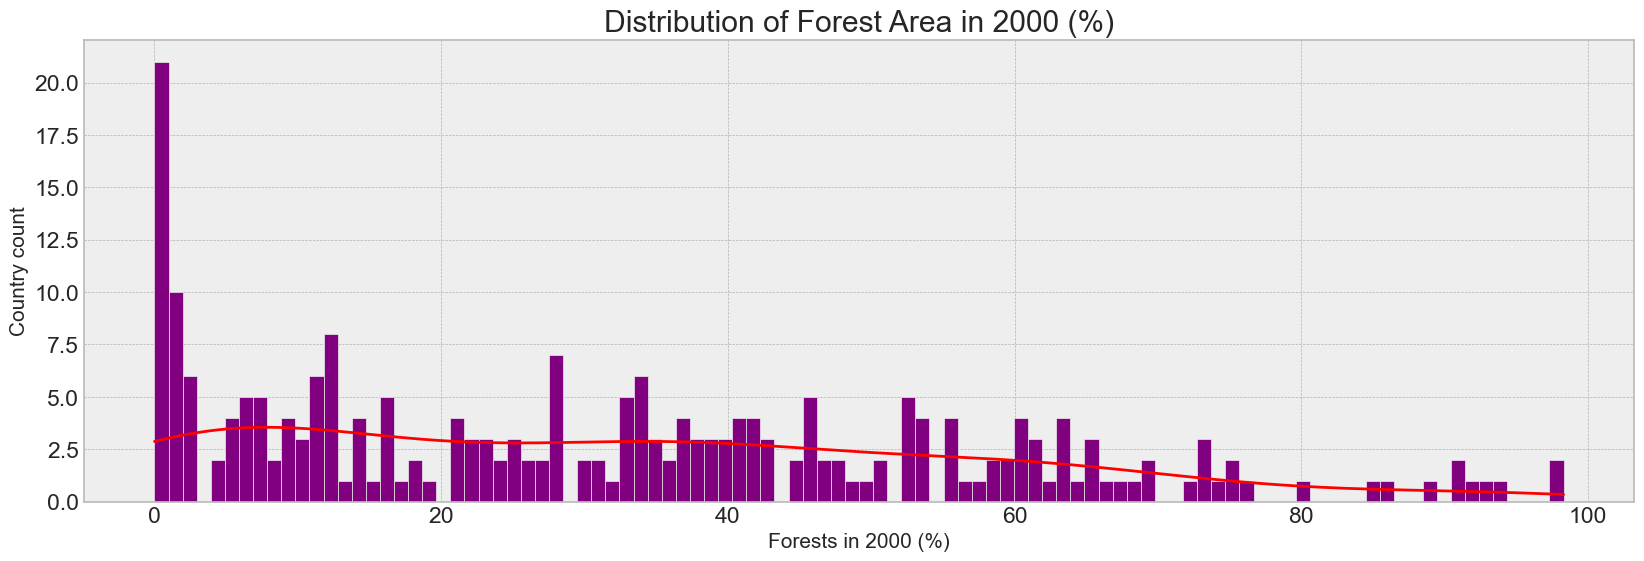

In [3152]:
# Distribution of Forest Area in 2000 (%)
plt.figure(figsize=(20, 6))
sns.histplot(data=dataframe, x="f_2000", kde=True, bins = 100,color = "red", facecolor = "purple")

plt.xlabel("Forests in 2000 (%)")
plt.ylabel("Country count")
plt.title("Distribution of Forest Area in 2000 (%)")
plt.show()

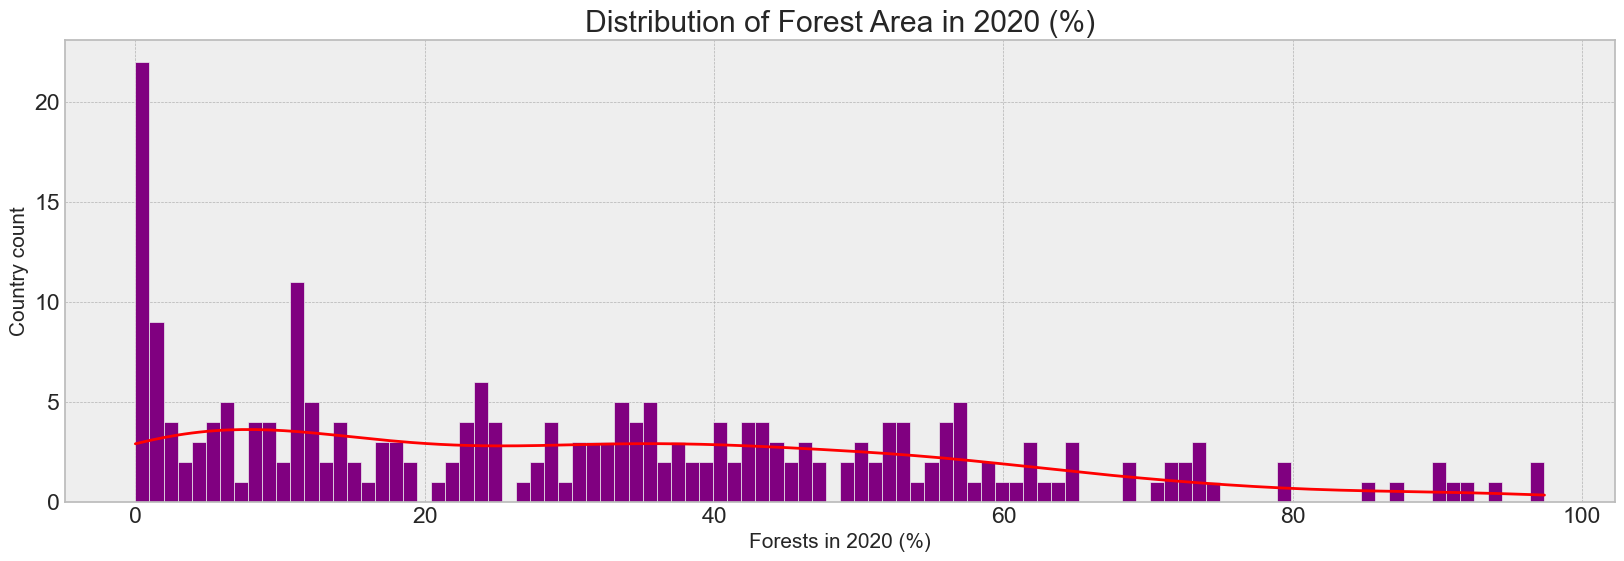

In [3153]:
# Distribution of Forest Area in 2020 (%)
plt.figure(figsize=(20, 6))
sns.histplot(data=dataframe, x="f_2020", kde = "True", bins = 100,color = "red", facecolor = "purple")

plt.xlabel("Forests in 2020 (%)")
plt.ylabel("Country count")
plt.title("Distribution of Forest Area in 2020 (%)")
plt.show()

Area by Continent, Region, and Development:

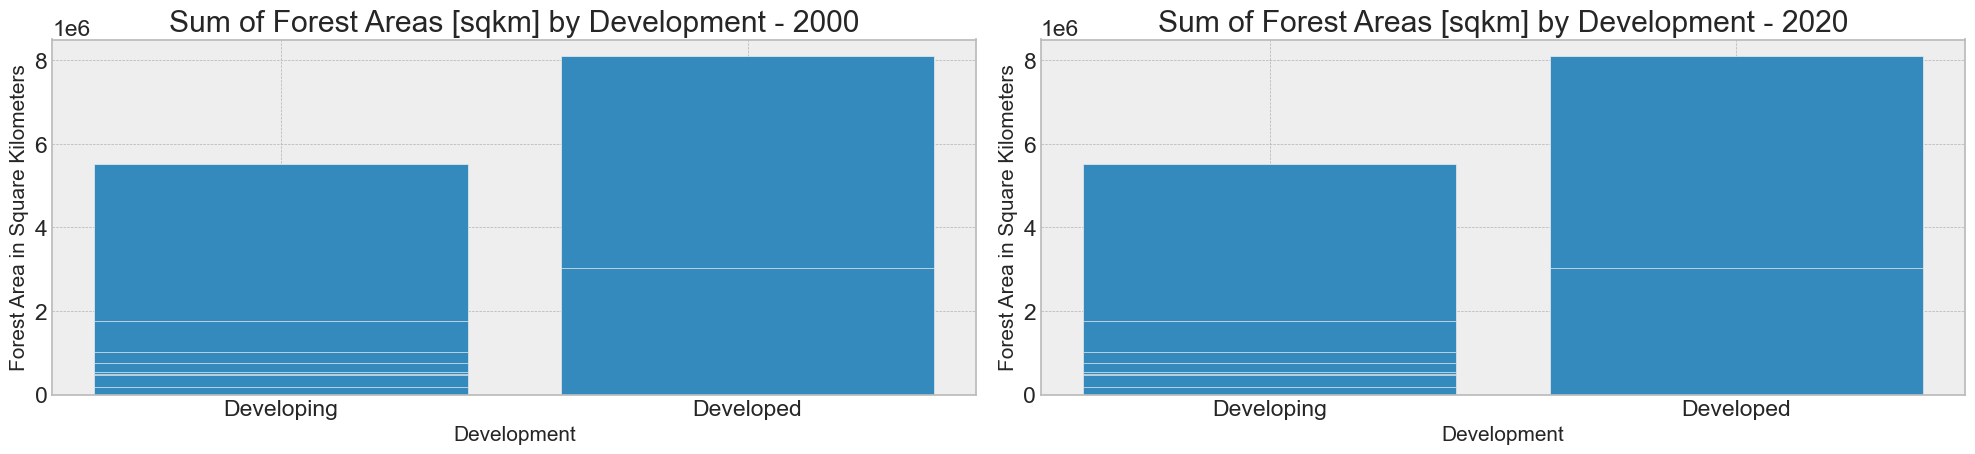

In [3154]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

axes[0].bar(dataframe['development'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Development')
axes[0].set_ylabel('Forest Area in Square Kilometers')
axes[0].set_title('Sum of Forest Areas [sqkm] by Development - 2000')

axes[1].bar(dataframe['development'], dataframe['2000_sqkm'])
axes[1].set_xlabel('Development')
axes[1].set_ylabel('Forest Area in Square Kilometers')
axes[1].set_title('Sum of Forest Areas [sqkm] by Development - 2020')  

# Adjust the layout for improved visualization
plt.tight_layout()

plt.show()

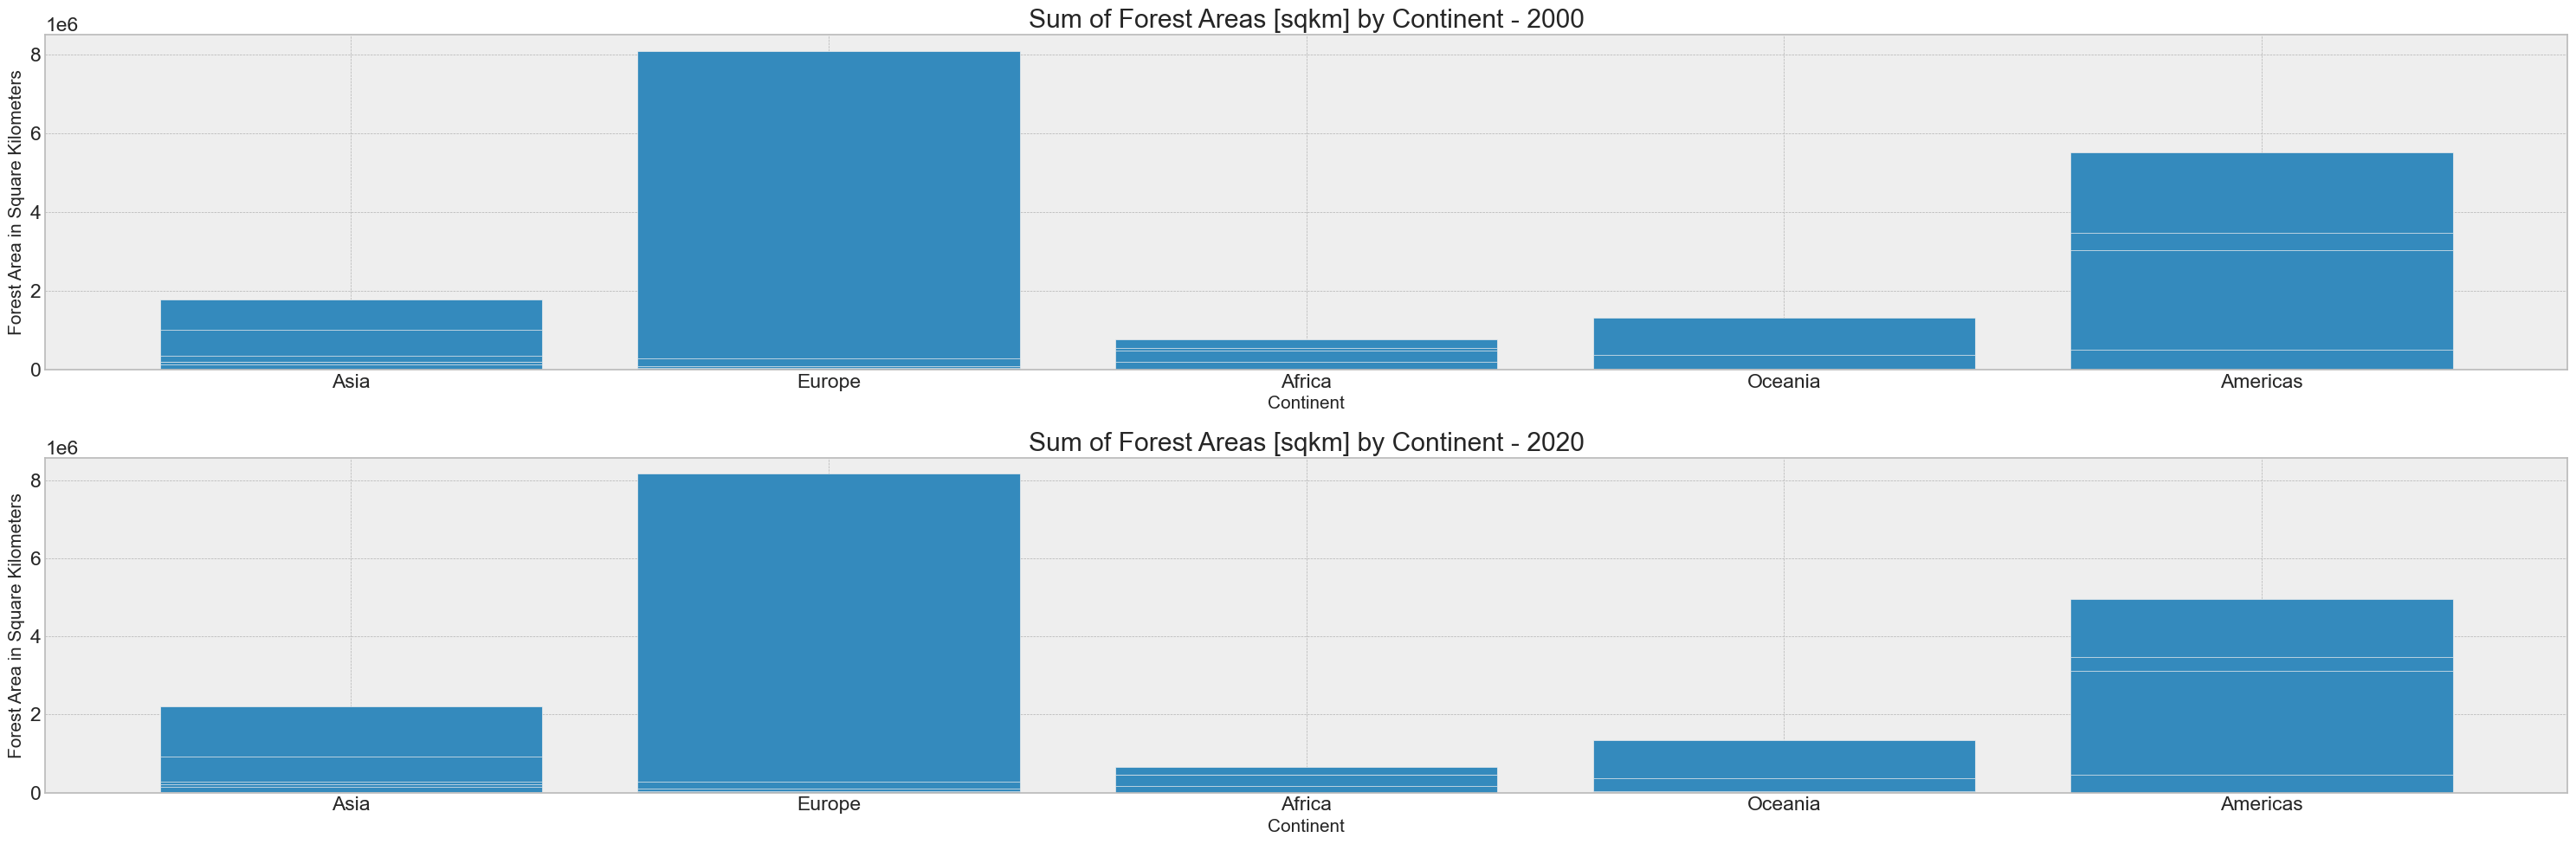

In [3155]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

axes[0].bar(dataframe['continent'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Continent')
axes[0].set_ylabel('Forest Area in Square Kilometers')
axes[0].set_title('Sum of Forest Areas [sqkm] by Continent - 2000')

axes[1].bar(dataframe['continent'], dataframe['2020_sqkm'])
axes[1].set_xlabel('Continent')
axes[1].set_ylabel('Forest Area in Square Kilometers')
axes[1].set_title('Sum of Forest Areas [sqkm] by Continent - 2020')

plt.tight_layout()

plt.show()

C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13192\1239728709.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


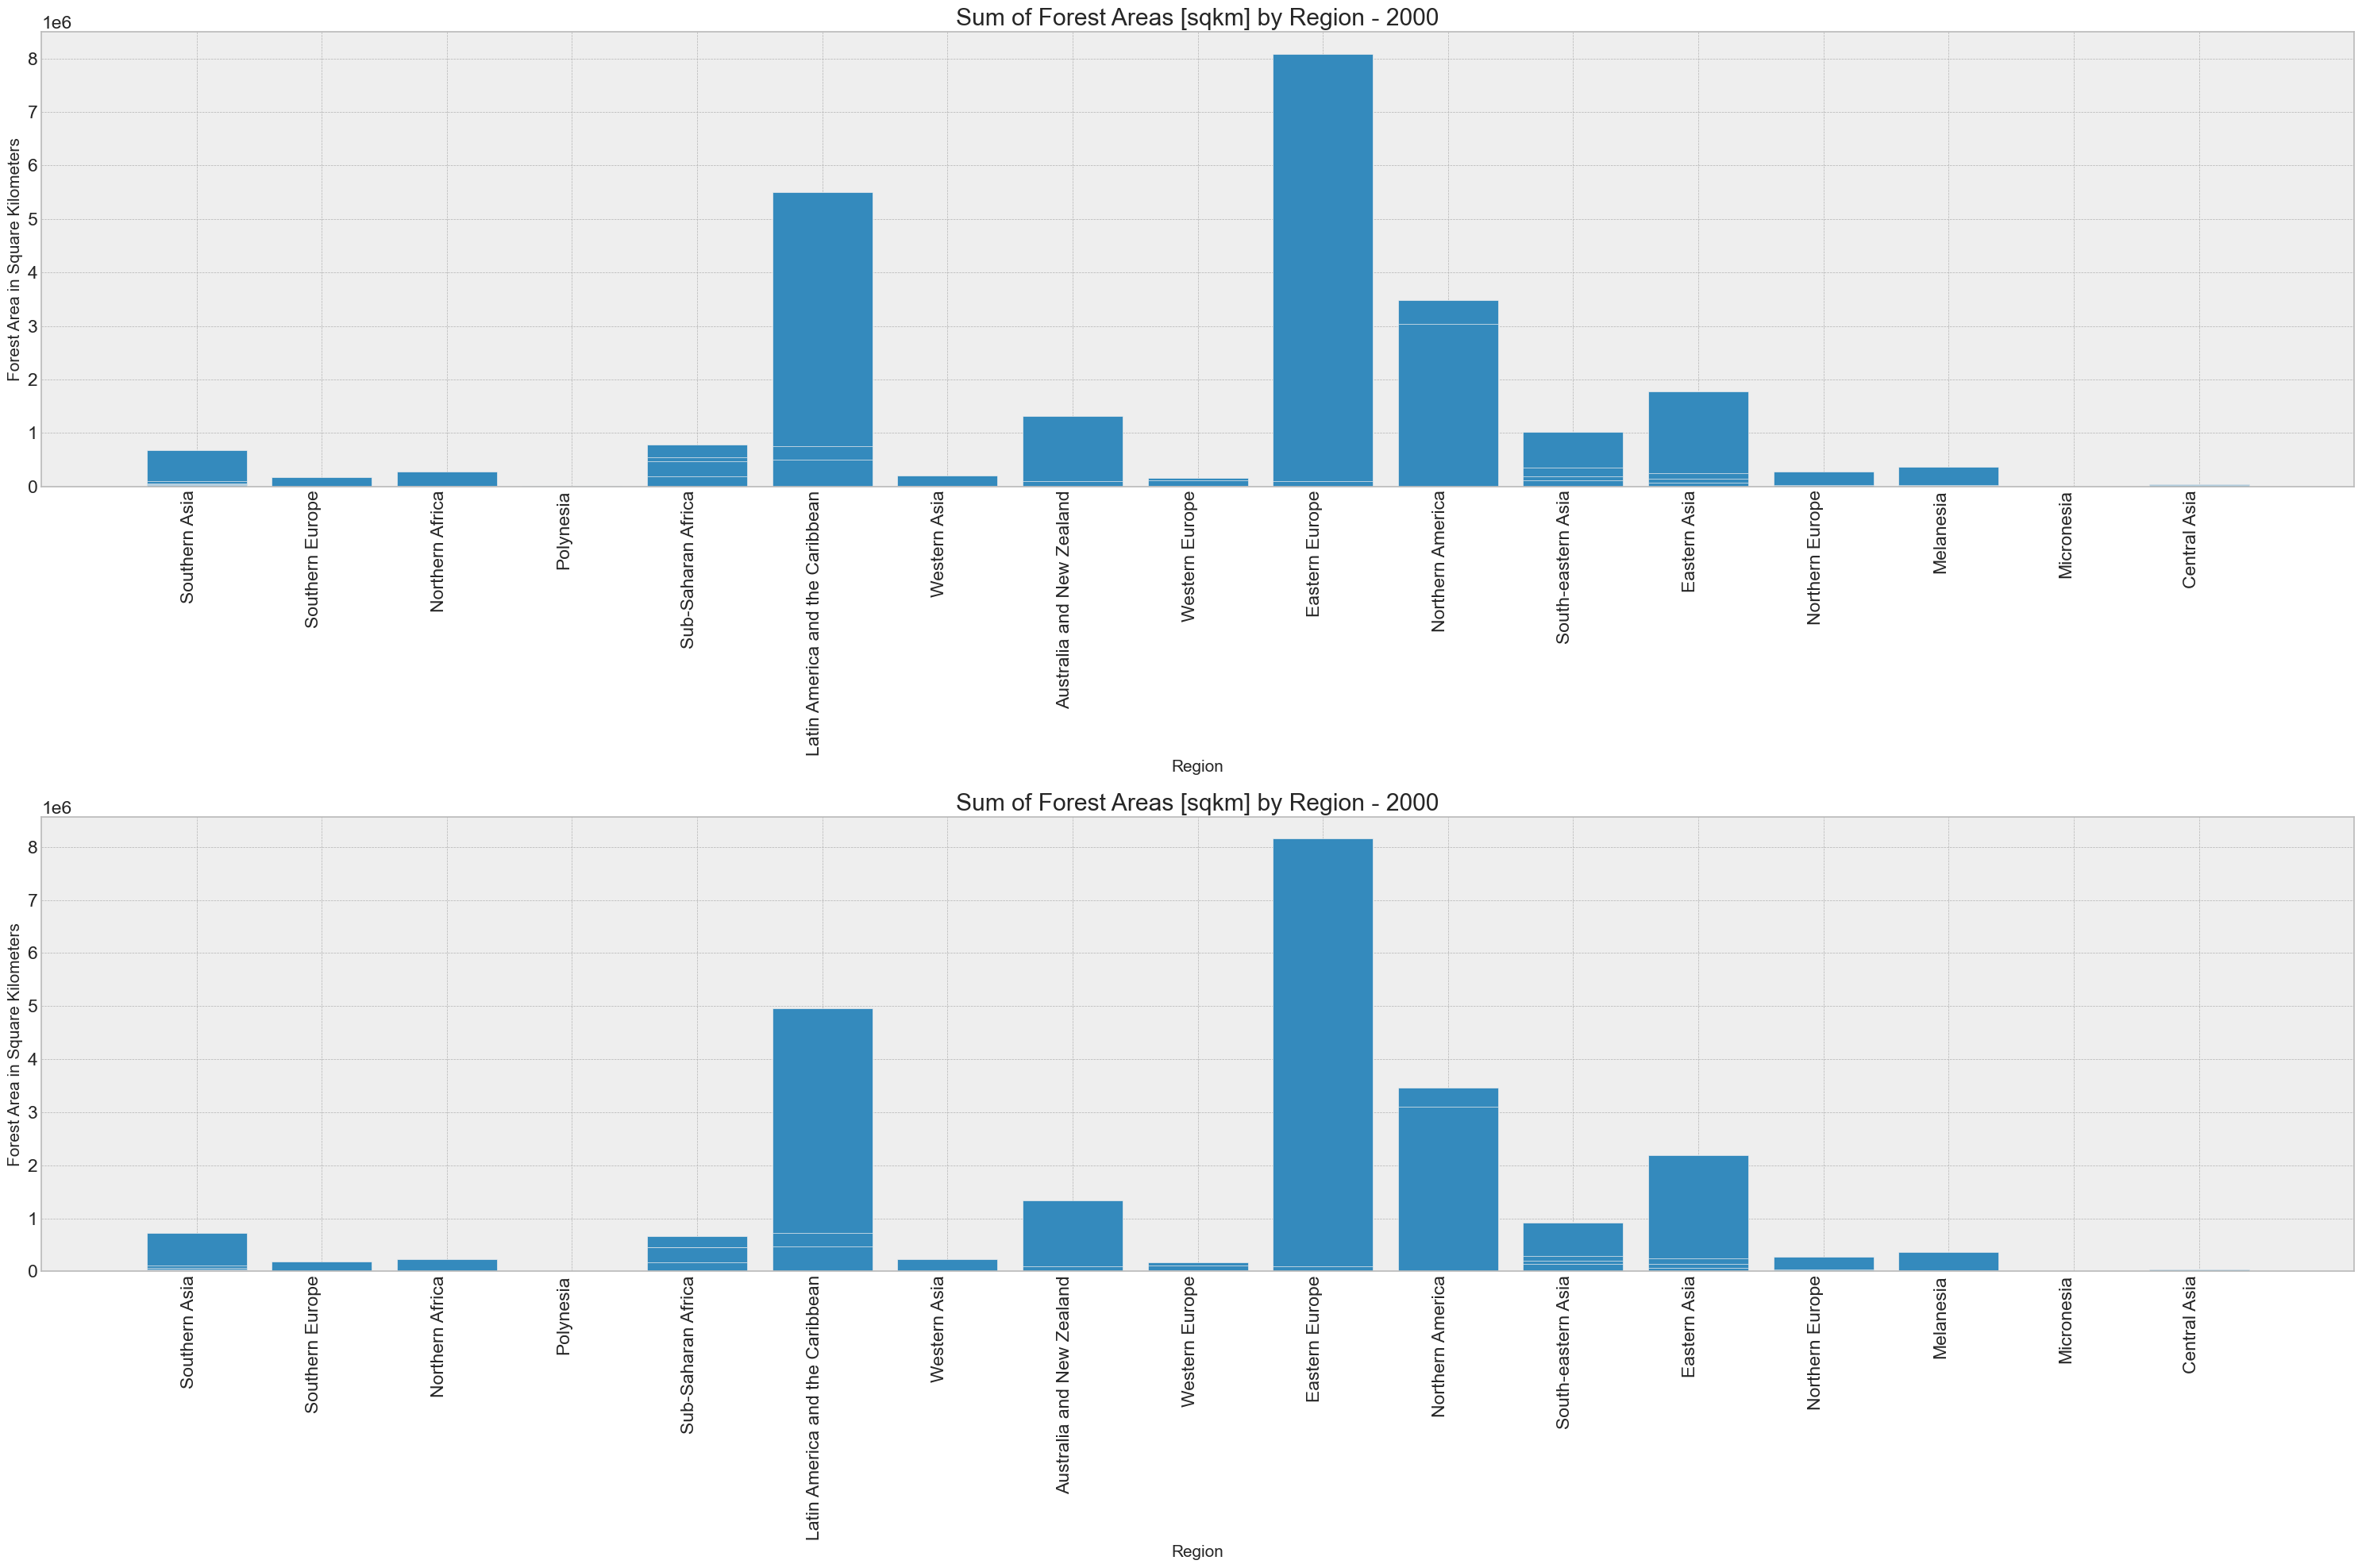

In [3156]:
fig, axes = plt.subplots(2, 1, figsize=(30, 20))

axes[0].bar(dataframe['region'], dataframe['2000_sqkm'])
axes[0].set_xlabel('Region')
axes[0].set_ylabel('Forest Area in Square Kilometers')
axes[0].set_title('Sum of Forest Areas [sqkm] by Region - 2000')

axes[1].bar(dataframe['region'], dataframe['2020_sqkm'])
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Forest Area in Square Kilometers')
axes[1].set_title('Sum of Forest Areas [sqkm] by Region - 2000')


for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

plt.tight_layout()

plt.show()

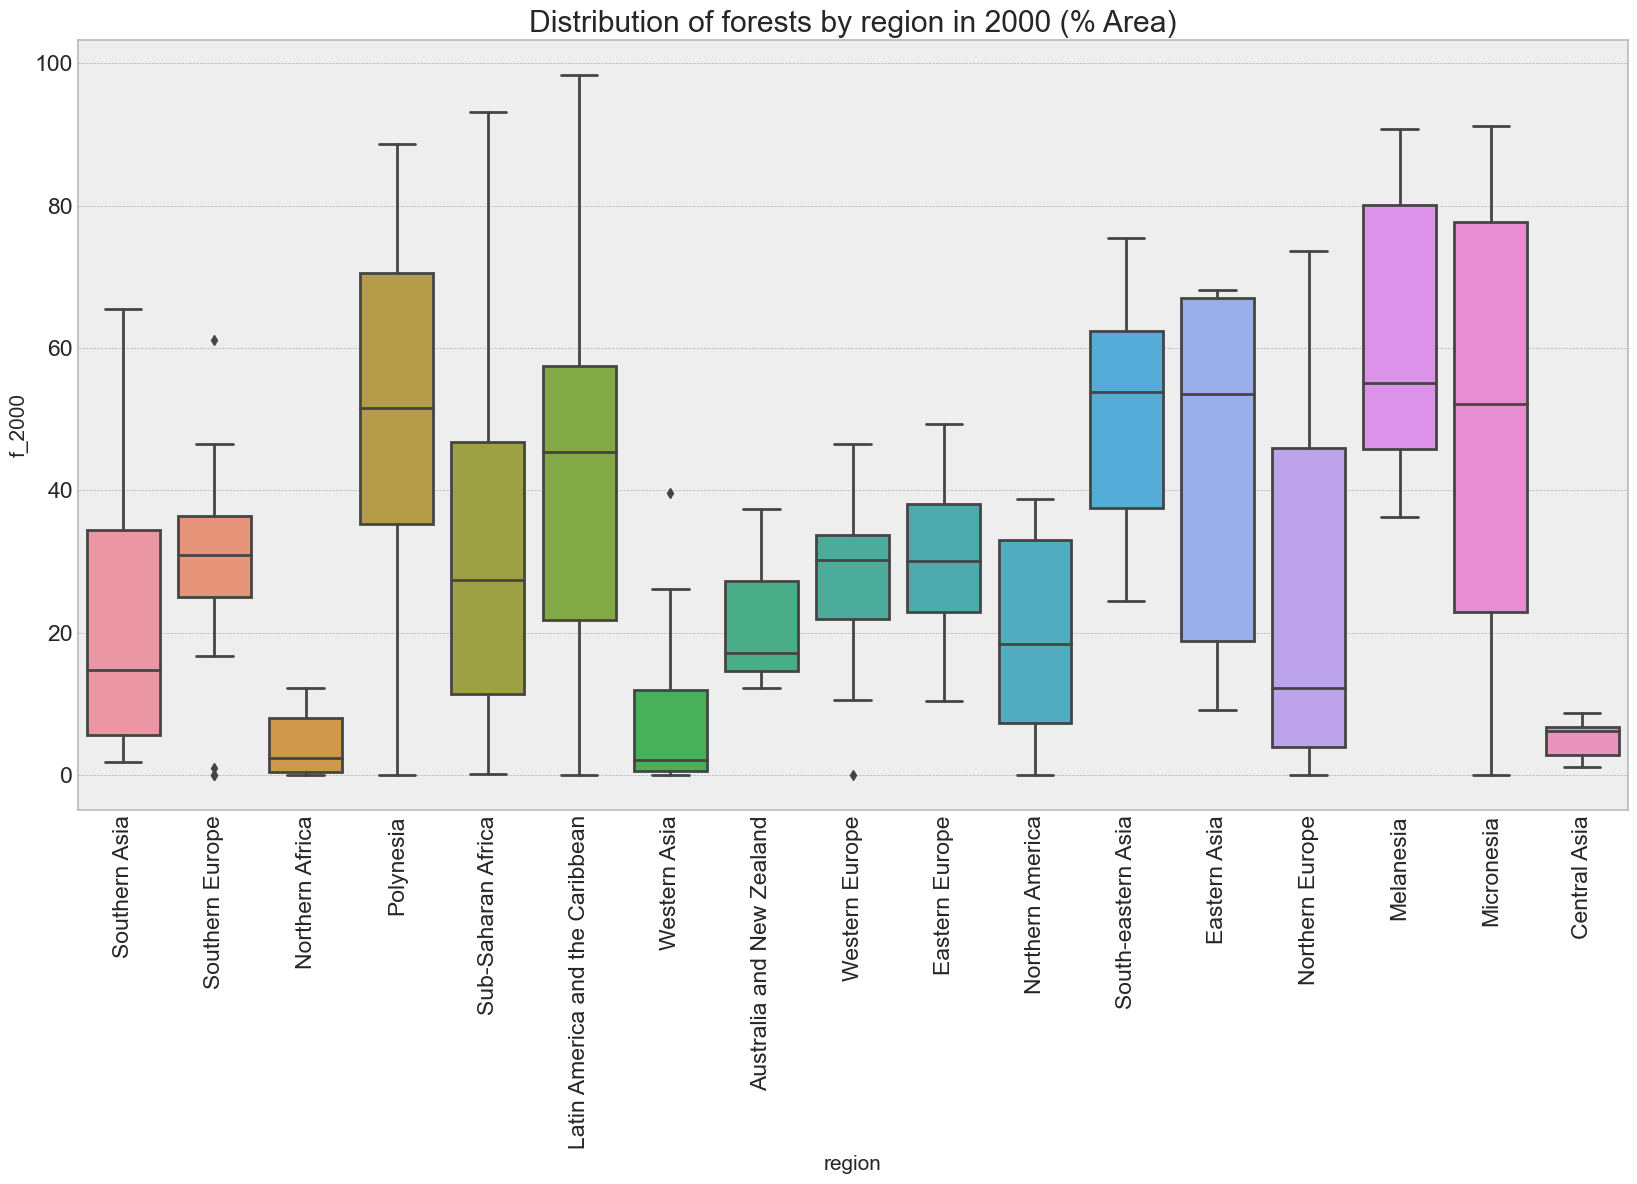

In [3157]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = 'f_2000')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 (% Area)")
plt.show()

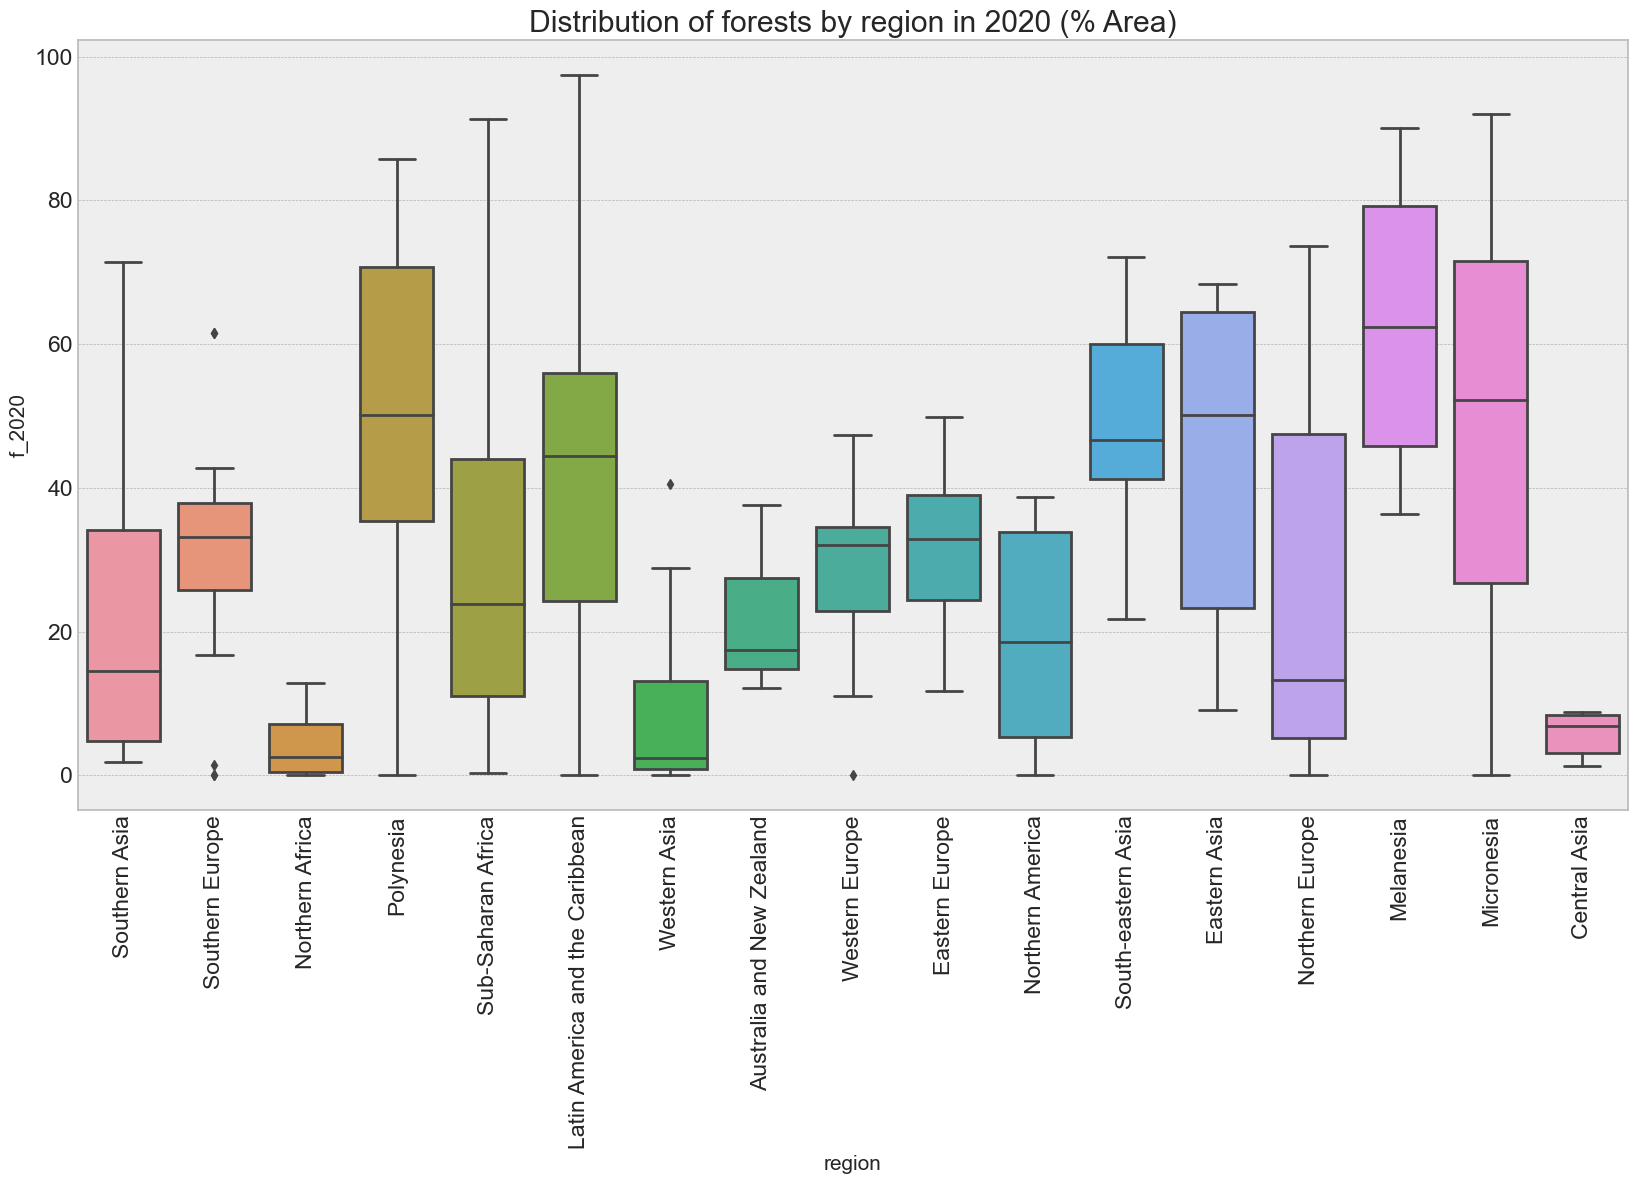

In [3158]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = 'f_2020')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2020 (% Area)")
plt.show()

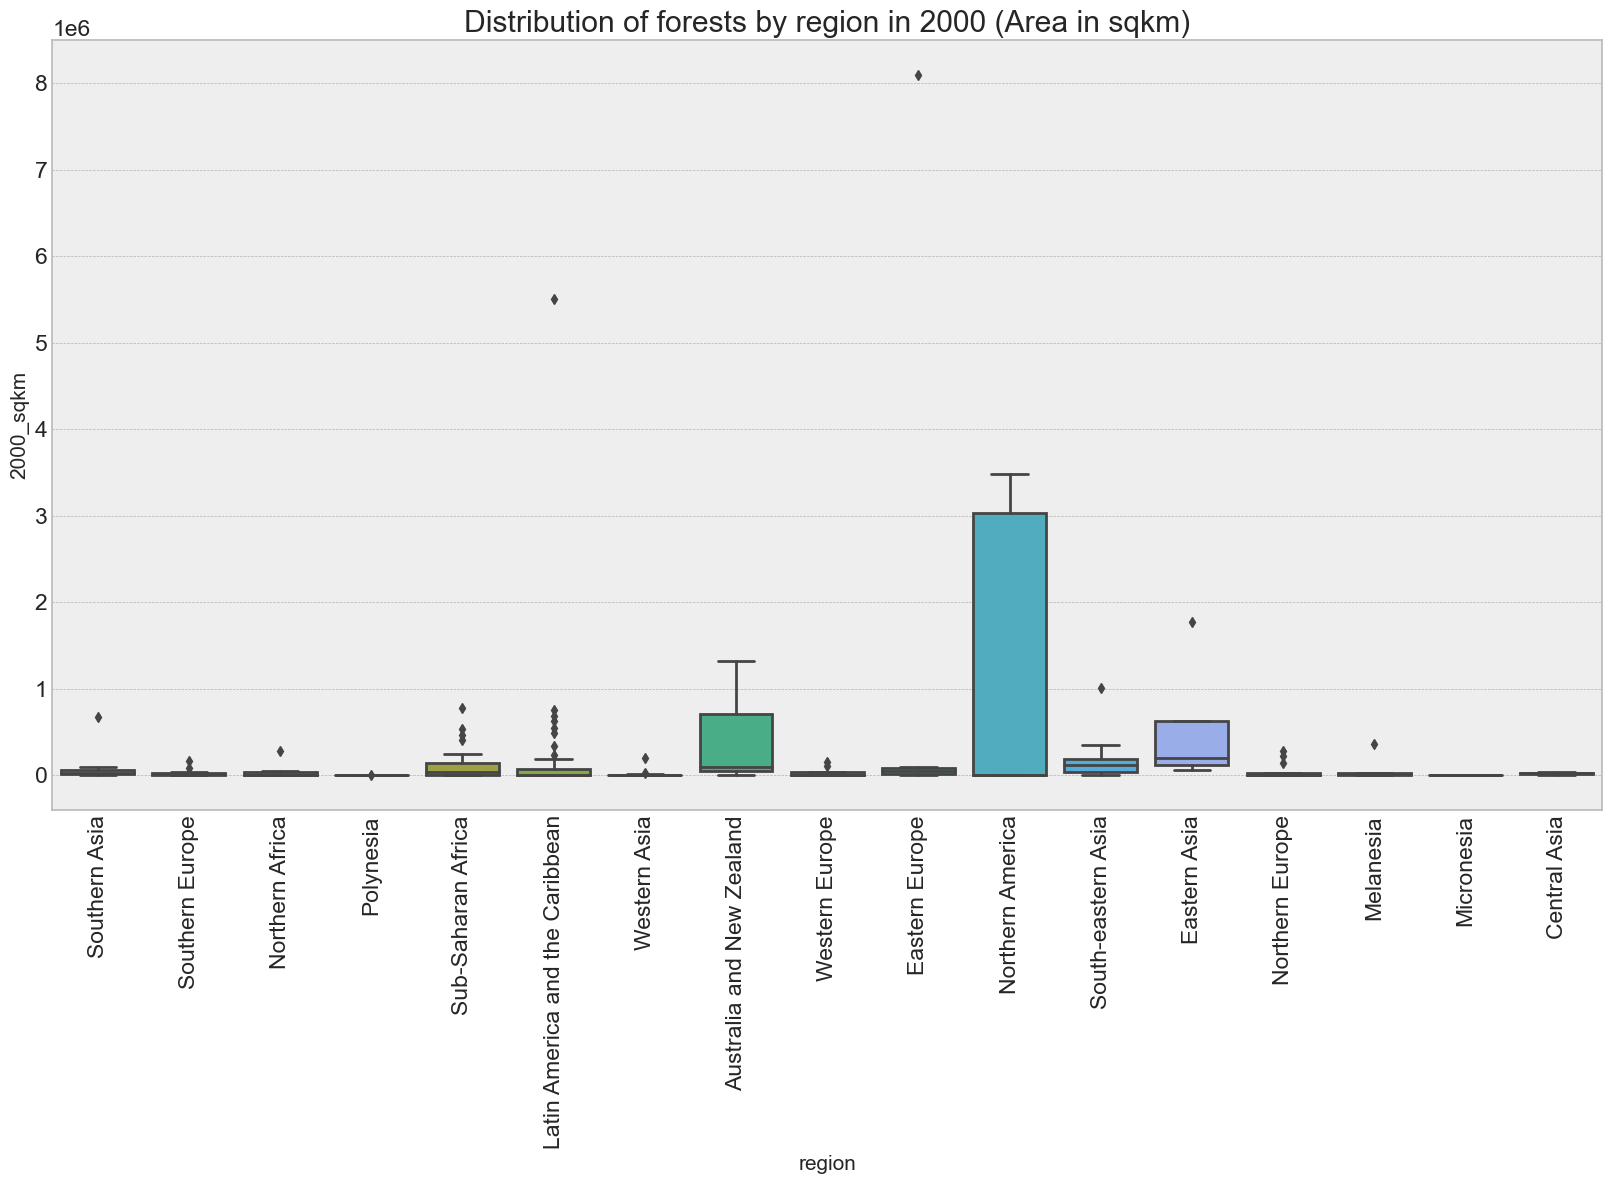

In [3159]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 (Area in sqkm)")
plt.show()

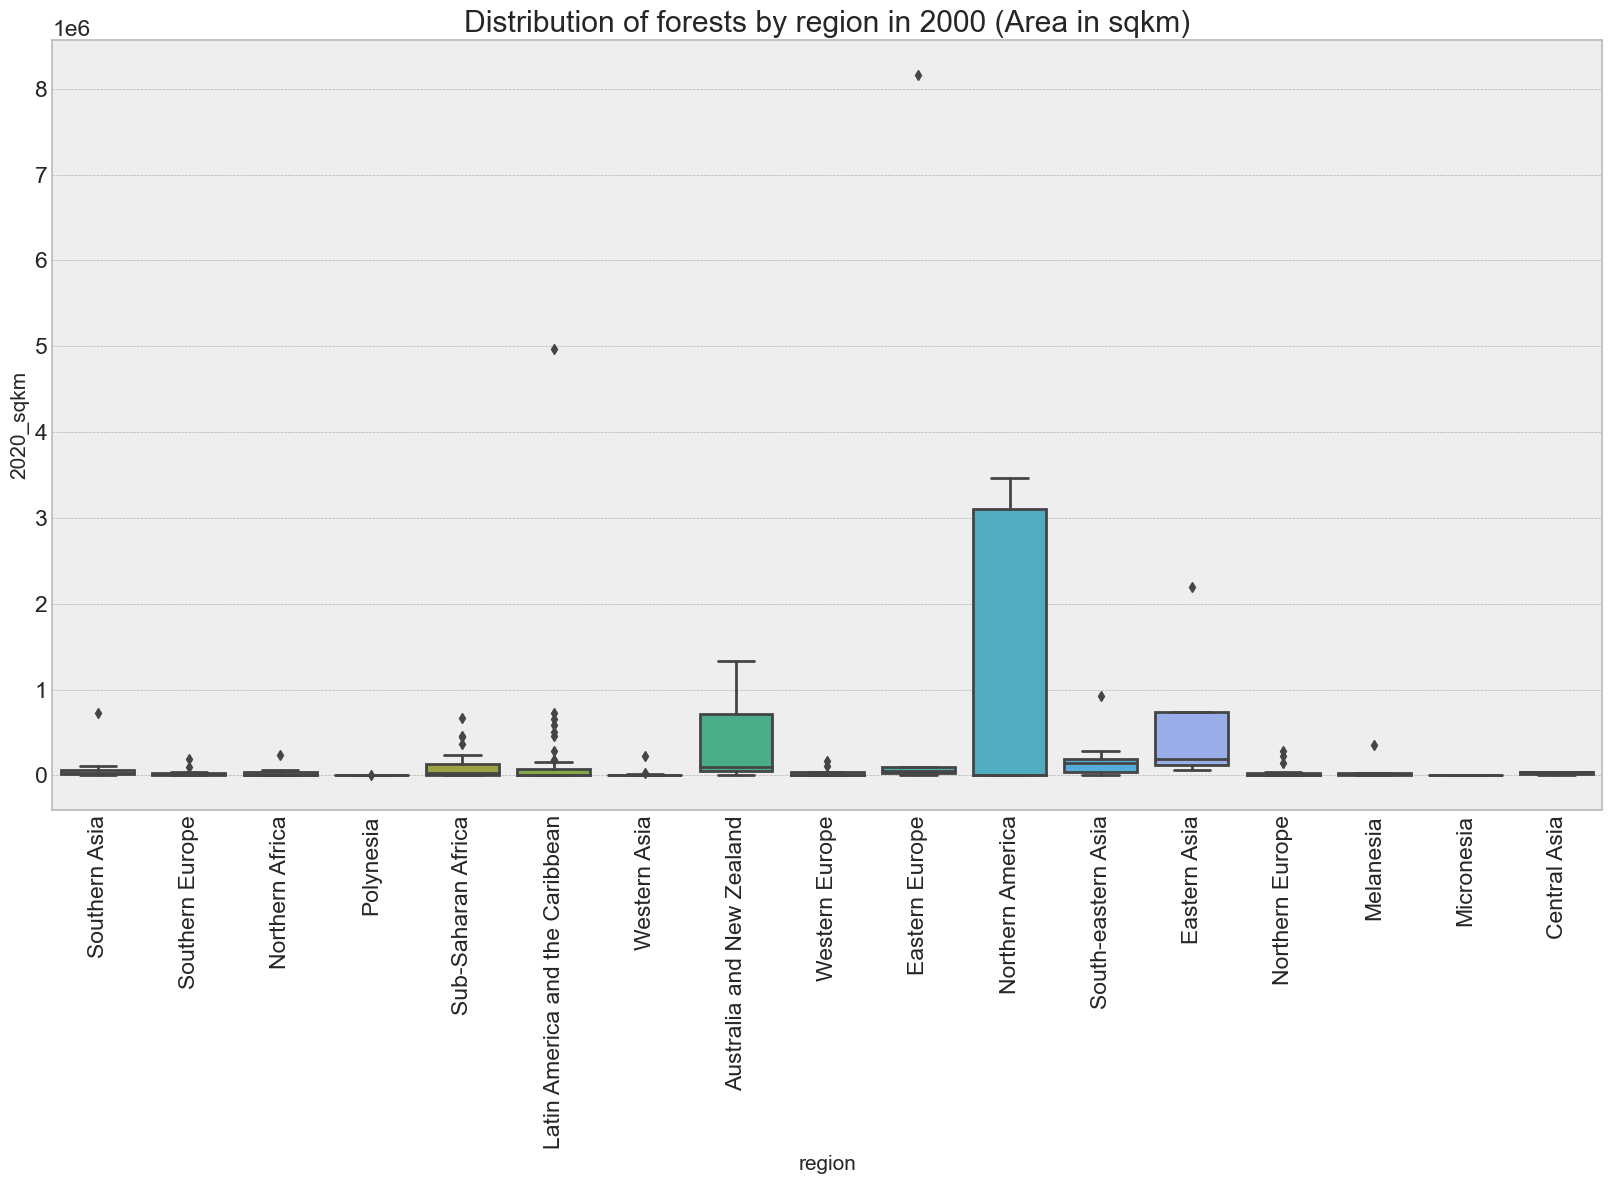

In [3160]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='region', y = '2020_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by region in 2000 (Area in sqkm)")
plt.show()

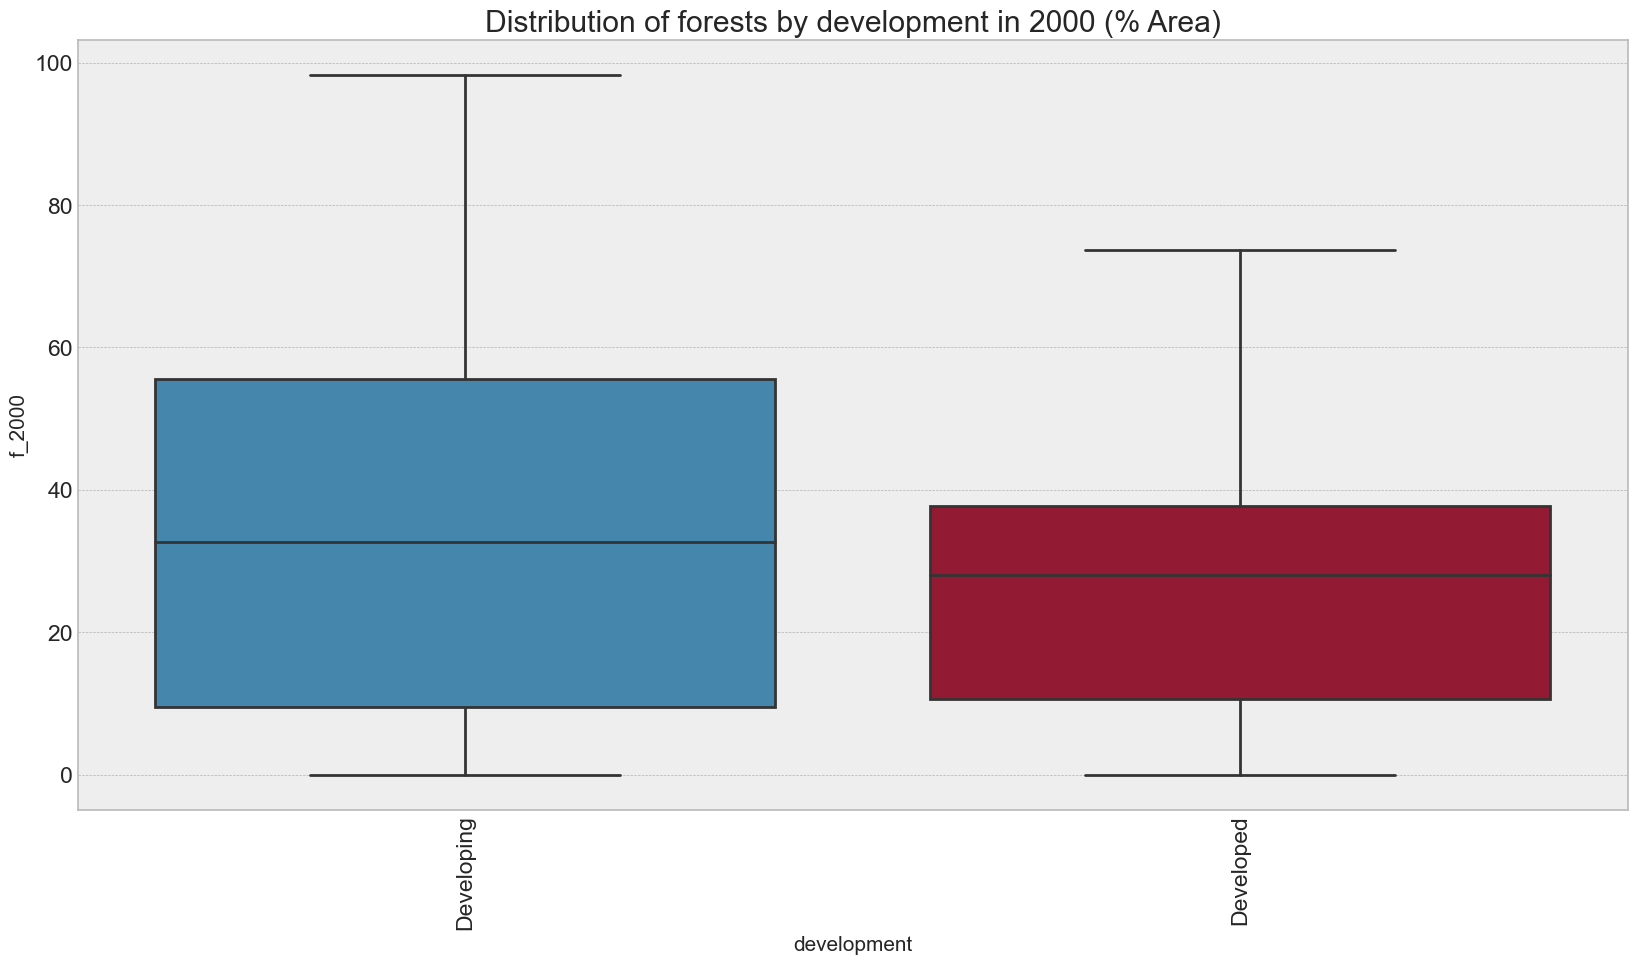

In [3161]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = 'f_2000')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2000 (% Area)")
plt.show()

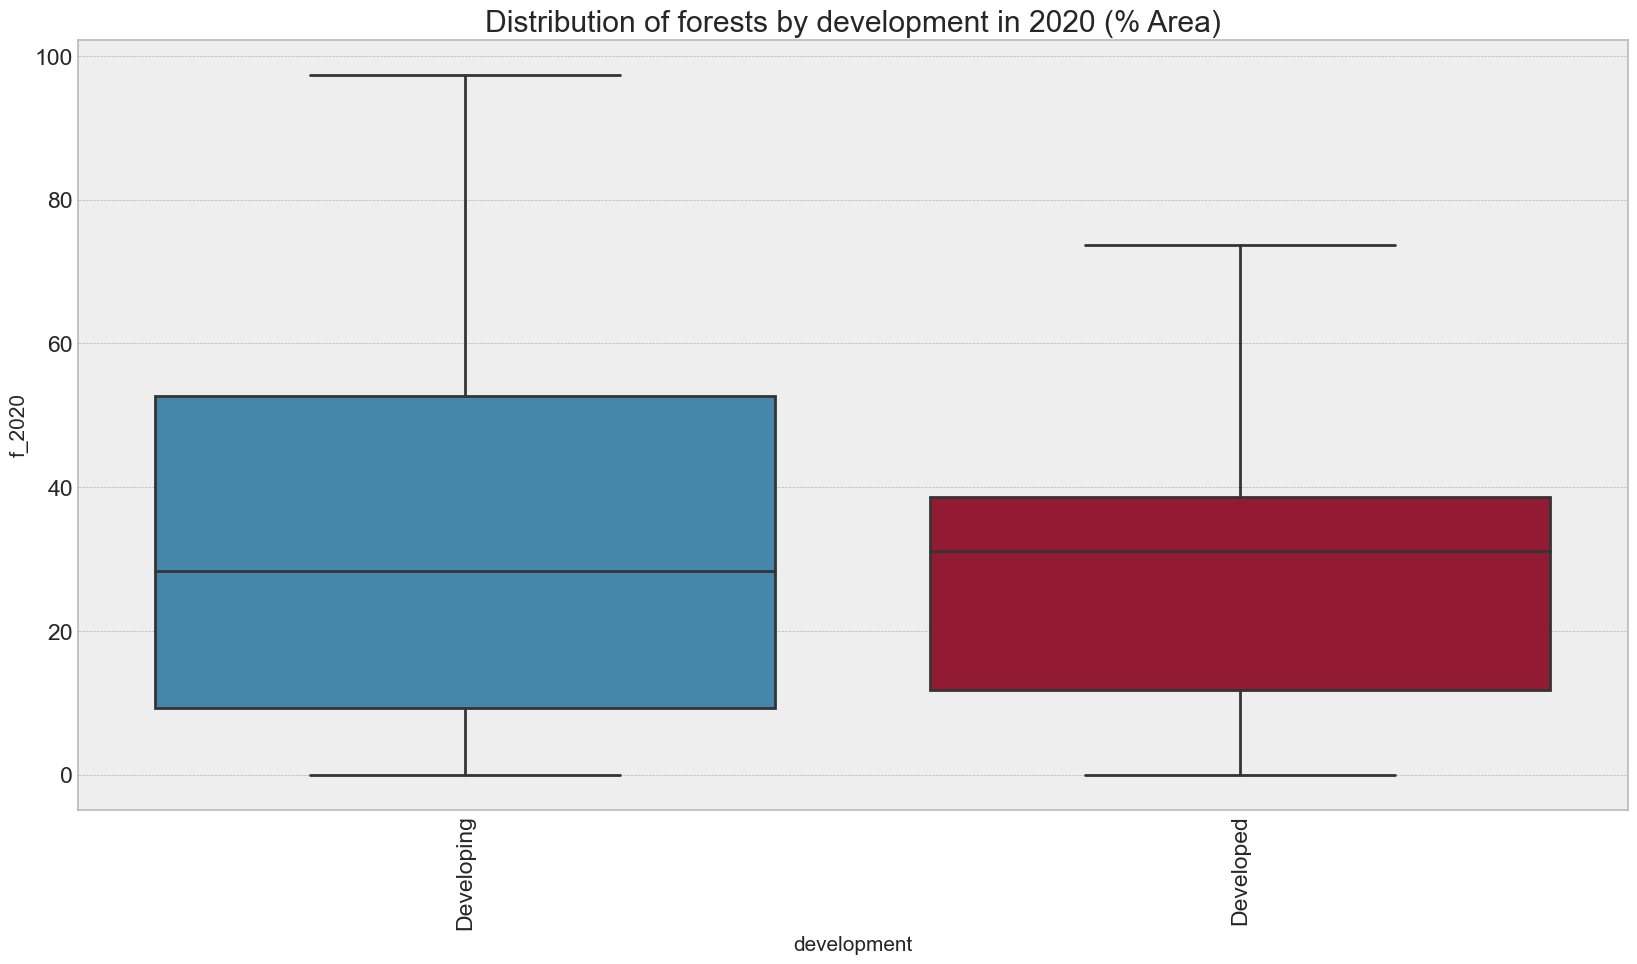

In [3162]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = 'f_2020')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2020 (% Area)")
plt.show()

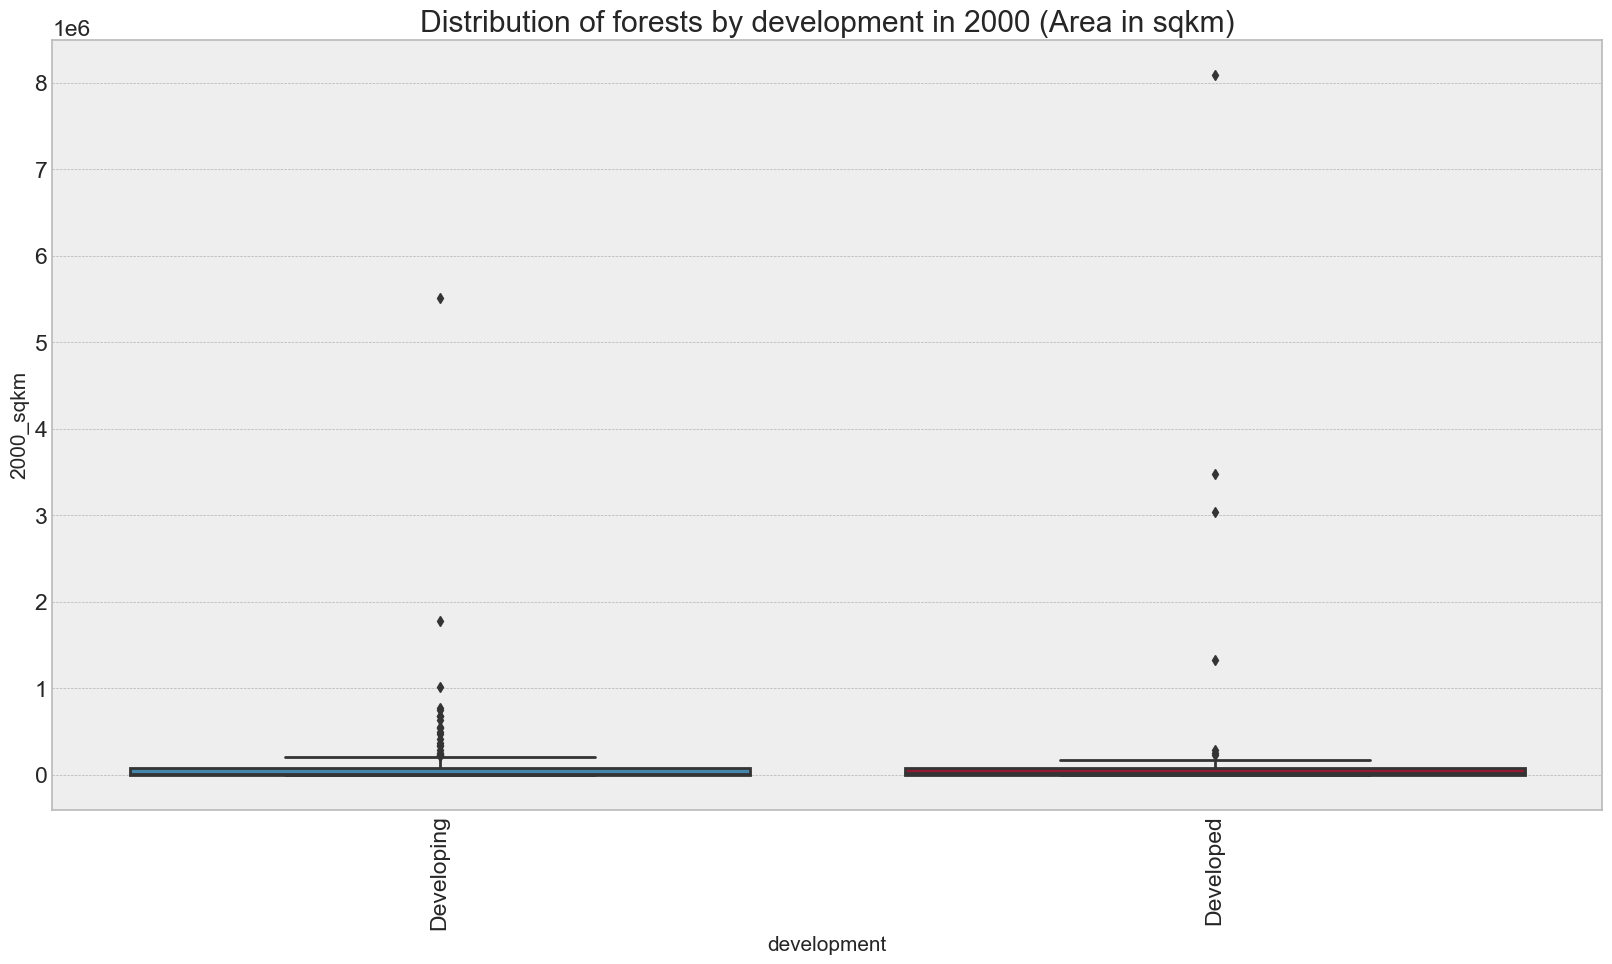

In [3163]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = dataframe, x='development', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development in 2000 (Area in sqkm)")
plt.show()

There is no valid information regarding the distribution of area over development due to potential outliers. Reanalyze this aspect either after cleaning outliers or after segmenting the data by region.

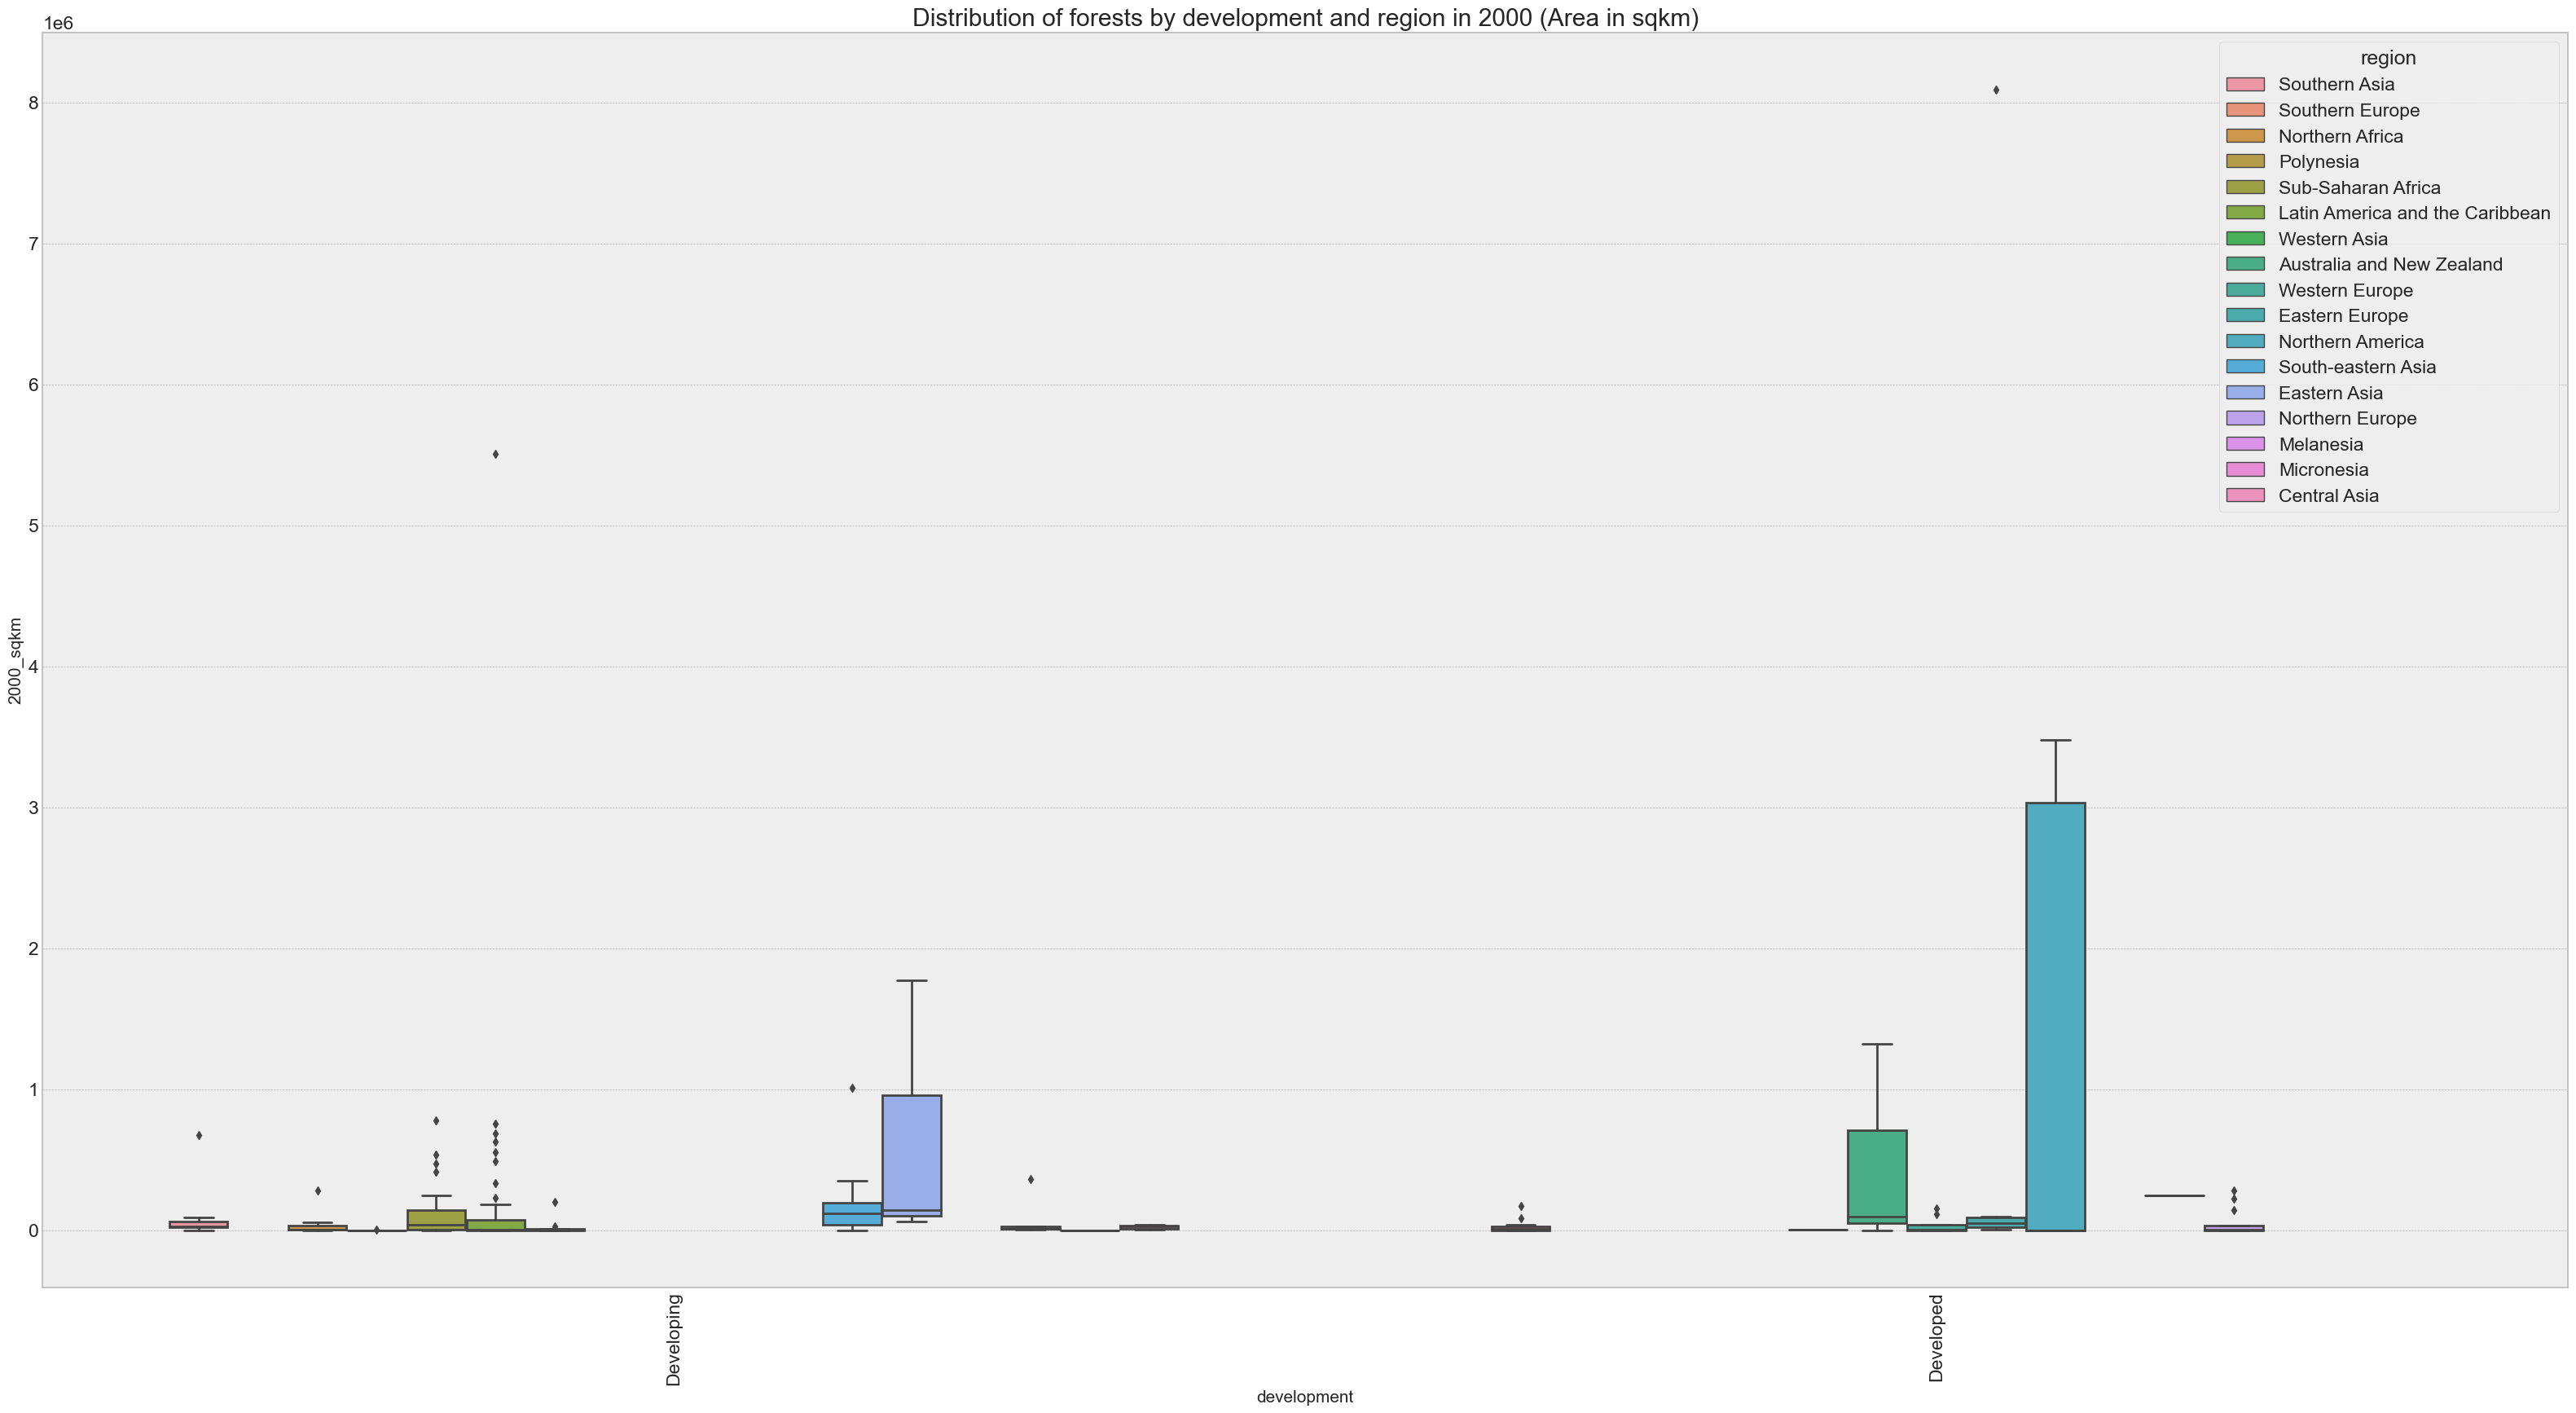

In [3164]:
# Distribuition of forests by development
plt.figure(figsize=(40, 20))
sns.boxplot(data = dataframe, x='development', y = '2000_sqkm', hue = 'region')
plt.xticks(rotation=90)
plt.title("Distribution of forests by development and region in 2000 (Area in sqkm)")
plt.show()

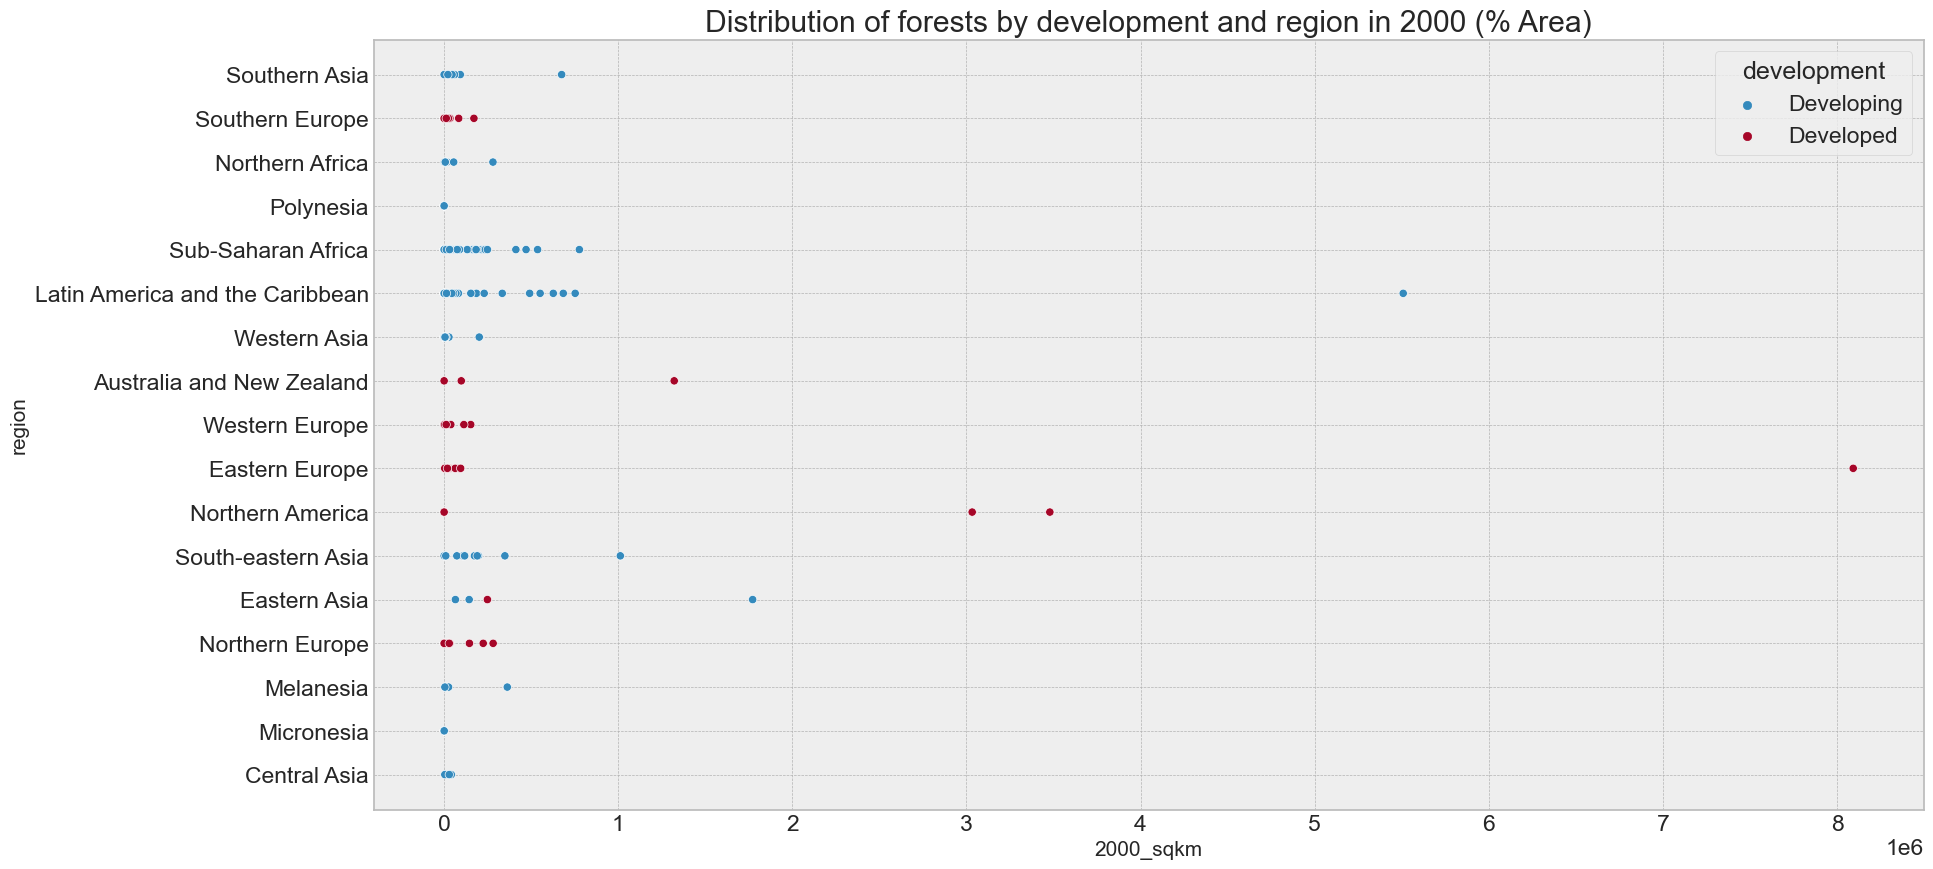

In [3165]:
# Understanding the area distribuition of the forest by certains categorical factors with scatterplot:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = dataframe, x = '2000_sqkm', y = 'region', hue = 'development')
plt.title("Distribution of forests by development and region in 2000 (% Area)")
plt.show()

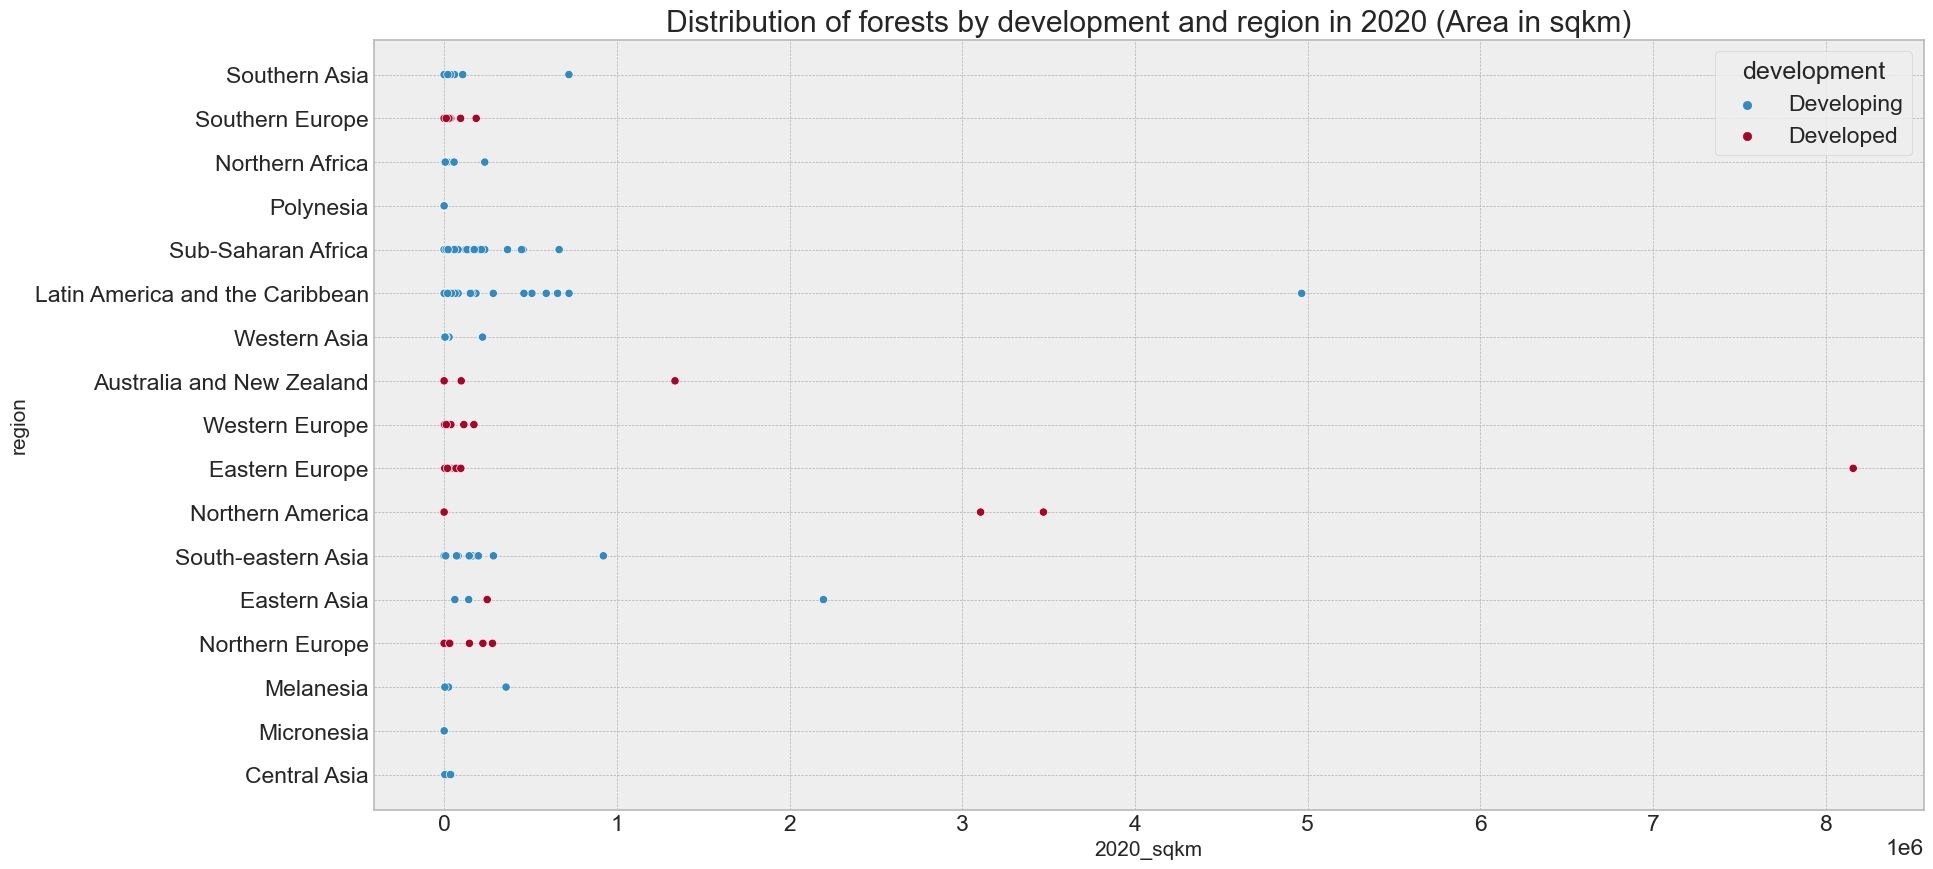

In [3166]:
# Understanding the area distribuition of the forest by certains categorical factors with scatterplot:
plt.figure(figsize=(20, 10))
sns.scatterplot(data = dataframe, x = '2020_sqkm', y = 'region', hue = 'development')
plt.title("Distribution of forests by development and region in 2020 (Area in sqkm)")
plt.show()

### Kernel Density Estimation (KDE) Analysis:

Kernel Density Estimation (KDE) is a non-parametric technique used for estimating the probability density function of a random variable. It visualizes the distribution of data points, as a smoothed curve, helping to identify patterns and trends in the data's underlying probability distribution.

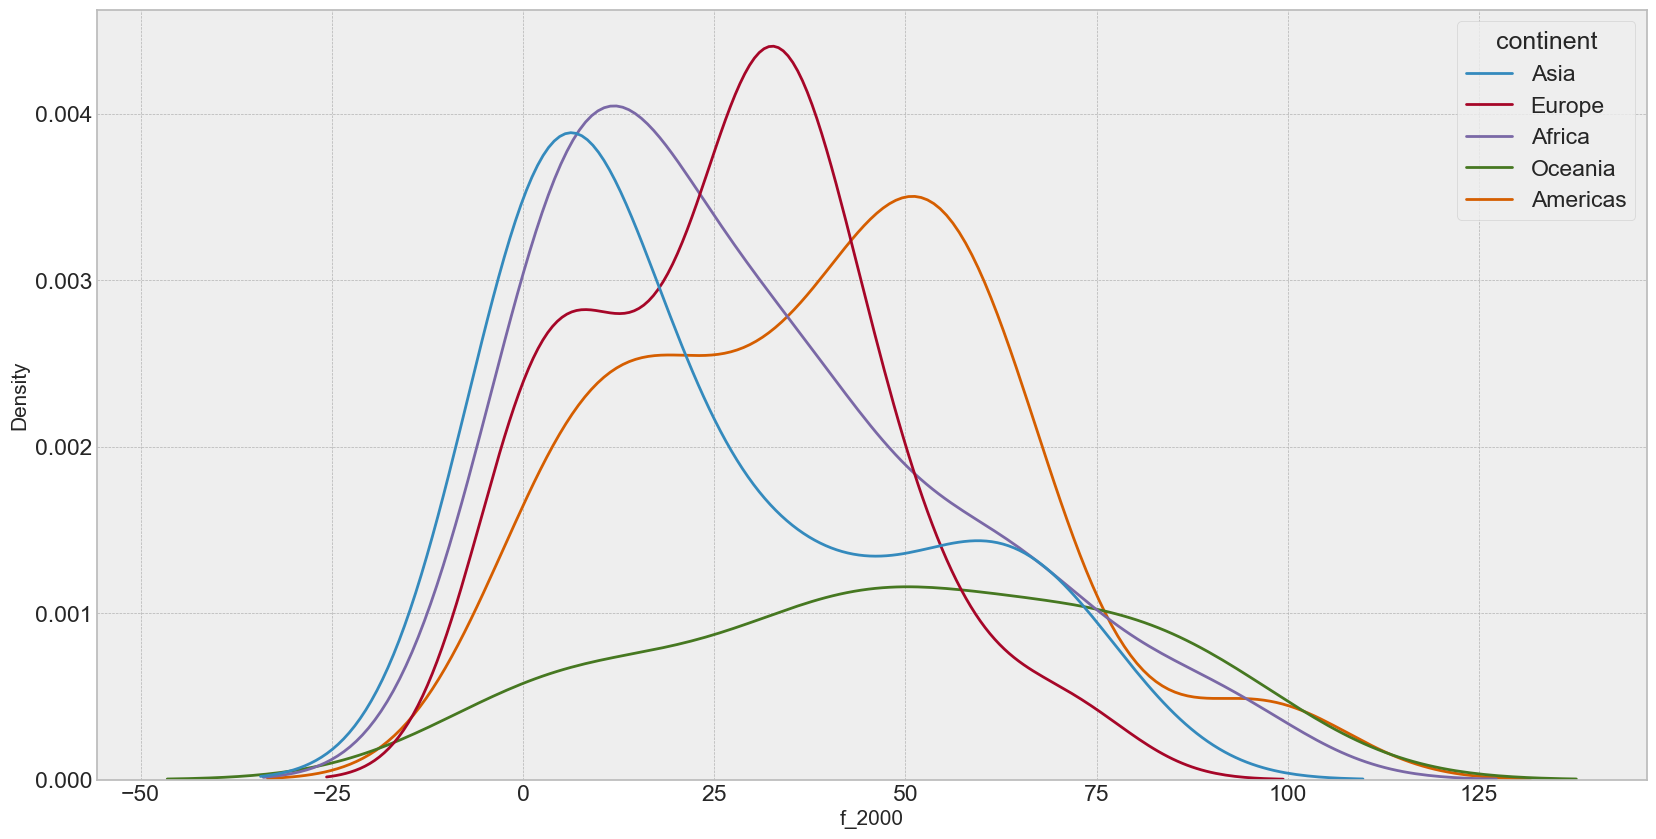

In [3167]:
# Analysing the distribuition by continents for pattern identification usingh KDE (Kernel Density Estimate):
plt.figure(figsize=(20, 10))
sns.kdeplot(data = dataframe, x = 'f_2000', hue = 'continent')
plt.show()

### Maximum and minimum area percent

Maximum:

In [3168]:
# Country with the highest percentage of area in 2000:
max_f_2000 = dataframe.loc[df['f_2000'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2000:", max_f_2000)

Country with the highest percentage of area in 2000: Suriname


In [3169]:
max_f_2000_value = dataframe['f_2000'].loc[dataframe['country_name'] == max_f_2000]

max_f_2000_value = max_f_2000_value.values[0]

print('Country with the highest percentage of area in 2000:', max_f_2000,', with the percent: ',max_f_2000_value)

Country with the highest percentage of area in 2000: Suriname , with the percent:  98.3


In [3170]:
# Country with the highest percentage of area in 2020:
max_f_2020 = dataframe.loc[df['f_2020'].idxmax(), 'country_name']
print("Country with the highest percentage of area in 2020:", max_f_2020)

Country with the highest percentage of area in 2020: Suriname


Suriname kept being the country with the highest percent area of forest area. Let's verify this value:

In [3171]:
max_f_2020_value = dataframe['f_2020'].loc[dataframe['country_name'] == max_f_2020]

max_f_2020_value = max_f_2020_value.values[0]

print('Country with the highest percentage of area in 2020:', max_f_2020,', with the percent: ',max_f_2020_value)

Country with the highest percentage of area in 2020: Suriname , with the percent:  97.4


In [3172]:
filtered_dataframe = dataframe[dataframe['f_2000'] > 0]

min_f_2000 = filtered_dataframe.loc[filtered_dataframe['f_2000'].idxmin(), 'country_name']

print("Country with the lowest percentage of area in 2000:", min_f_2000)

Country with the lowest percentage of area in 2000: Egypt


Let's check it out:

In [3173]:
min_f_2000_row = filtered_dataframe[filtered_dataframe['f_2000'] == filtered_dataframe['f_2000'].min()]

min_f_2000_country = min_f_2000_row['country_name'].values[0]

min_f_2000_value = min_f_2000_row['f_2000'].values[0]

print('Country with the lowest percentage of area in 2000:', min_f_2000_country, ', with the percent:', min_f_2000_value)

Country with the lowest percentage of area in 2000: Egypt , with the percent: 0.1


In [3174]:
# Country with the lowest percentage of area in 2020:
filtered_dataframe = dataframe[dataframe['f_2020'] > 0]

min_f_2020 = filtered_dataframe.loc[filtered_dataframe['f_2020'].idxmin(), 'country_name']

print("Country with the lowest percentage of area in 2020:", min_f_2020)

Country with the lowest percentage of area in 2020: Faroe Islands


Let's check it out:

In [3175]:
min_f_2020_value = filtered_dataframe['f_2020'].loc[filtered_dataframe['country_name'] == min_f_2020]

min_f_2020_value = min_f_2020_value.values[0]

print('Country with the lowest percentage of area in 2020:', min_f_2020,', with the percent: ',min_f_2020_value)

Country with the lowest percentage of area in 2020: Faroe Islands , with the percent:  0.1


In [3176]:
# Creating a dataframe with the results:

extreme_values = pd.DataFrame({'Year': [2000, 2020],
                   'Highest Forests Countries': [max_f_2000, max_f_2000],
                   'Highest Forests (%)' : [max_f_2000_value, max_f_2020_value],
                   'Lowest Forests Countries': [min_f_2000, min_f_2000],
                   'Lowest Forests (%)' : [min_f_2000_value, min_f_2020_value]
                   })

extreme_values

,Year,Highest Forests Countries,Highest Forests (%),Lowest Forests Countries,Lowest Forests (%)
0,2000,Suriname,98.3,Egypt,0.1
1,2020,Suriname,97.4,Egypt,0.1


## Correlation between the columns

To analyze the correlation between numerical and categorical variables, we will transform the categorical variables into numerical format by assigning an ID to each new value in the categories using the label encoding method.

'Label encoding is a technique used to transform categorical data into numerical format. It assigns a unique integer to each category in the column, effectively converting non-numeric labels into numeric representations. This allows machine learning models to process and analyze categorical features more effectively since many algorithms rely on numerical inputs. However, it's important to note that label encoding should be used with caution, especially with ordinal variables, as assigning numerical values to categories may introduce unintended ordinal relationships that could impact the model's performance.'

In [3177]:
encoded_dataframe = dataframe.copy()

label_encoder = LabelEncoder()
encoded_dataframe['development'] = label_encoder.fit_transform(encoded_dataframe['development'])
encoded_dataframe['region'] = label_encoder.fit_transform(encoded_dataframe['region'])
encoded_dataframe['continent'] = label_encoder.fit_transform(encoded_dataframe['continent'])

# Checking:
encoded_dataframe.head(5)

,country,country_name,development,region,continent,2000_sqkm,f_2000,2020_sqkm,f_2020,difference_perc,difference_abs
0,AFG,Afghanistan,1,12,2,12392.37,1.9,12392.37,1.9,0.0,0.00
1,ALB,Albania,0,13,3,7699.40,28.1,7891.20,28.8,0.7,191.80
2,DZA,Algeria,1,7,0,16672.18,0.7,19053.92,0.8,0.1,2381.74
3,ASM,American Samoa,1,10,4,177.40,88.7,171.40,85.7,-3.0,-6.00
4,AND,Andorra,0,13,3,159.80,34.0,159.80,34.0,0.0,0.00


C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13192\3024613349.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(encoded_dataframe.corr(), annot = True)


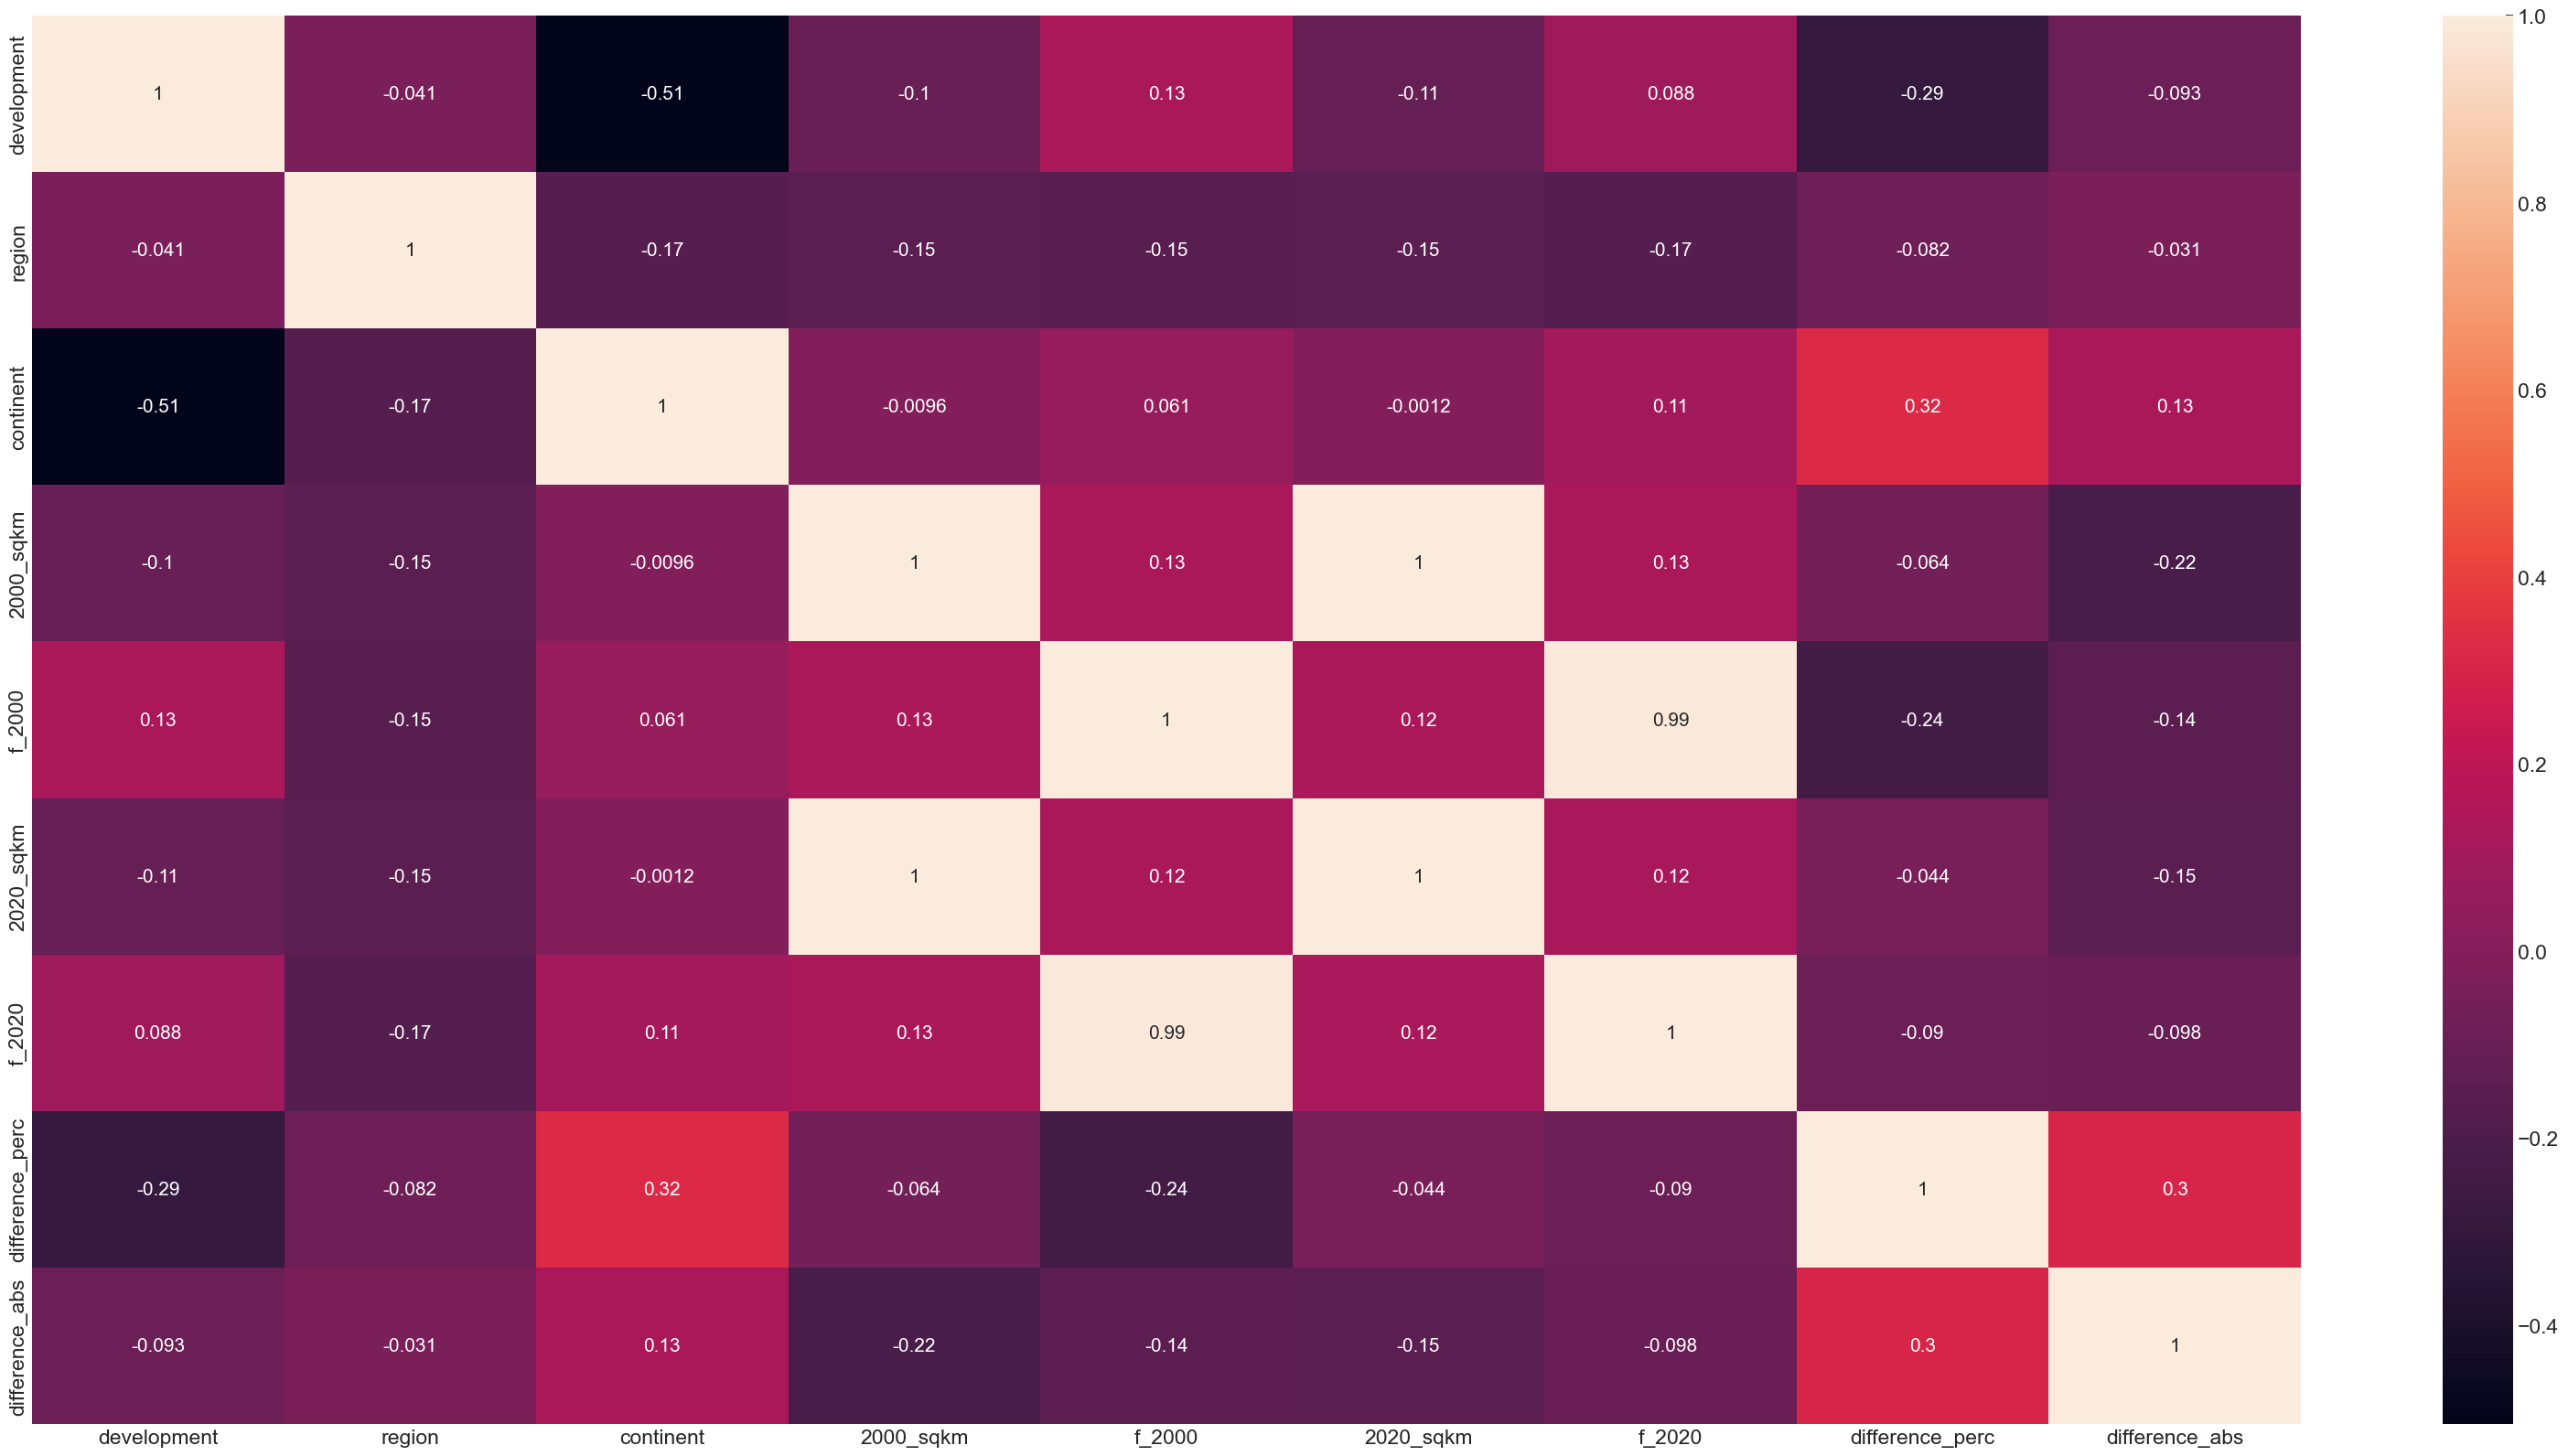

In [3178]:
plt.figure(figsize=(40, 20))
sns.heatmap(encoded_dataframe.corr(), annot = True)
plt.show()

As depicted in the heatmap above, there is no evident correlation between the forest size-related variables and country characteristics.

## Dealing with Outliers
Analyzing outliers using Boxplots;

Applying the Interquartile Range (IQR) method;

Addressing and Managing Outliers.

### Boxplot analysis of outliers:

Forest Area in 2000: When it comes to area percentages, it's more challenging to identify outliers due to the narrow range. Therefore, to detect outliers, we will focus on the absolute area values.

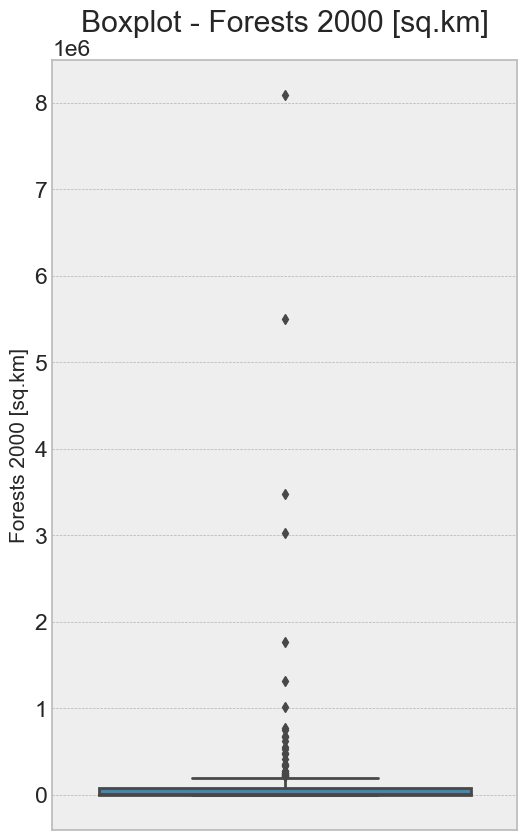

In [3179]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe, y= '2000_sqkm')
plt.ylabel("Forests 2000 [sq.km]")
plt.title("Boxplot - Forests 2000 [sq.km]")
plt.show()

The boxplot analysis reveals the presence of numerous outliers.

Forest Area in 2020:

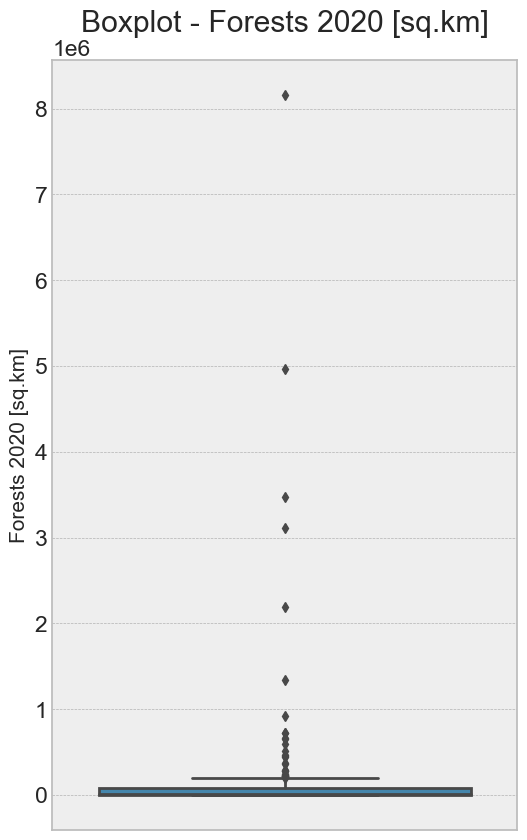

In [3180]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe, y= '2020_sqkm')
plt.ylabel("Forests 2020 [sq.km]")
plt.title("Boxplot - Forests 2020 [sq.km]")
plt.show()

The boxplot analysis indicates the presence of numerous outliers.

### Applying Interquartile Range (IQR) to Filter Data for Improved Comprehension

Forest Area in 2000:

In [3181]:
# Find the 75th and 25th percentiles
f_seventy_fifth_2000 = dataframe['2000_sqkm'].quantile(0.75)
f_twenty_fifth_2000 = dataframe['2000_sqkm'].quantile(0.25)

# Calculate iqr
f_iqr_2000 = f_seventy_fifth_2000 - f_twenty_fifth_2000

# Calculate the thresholds
upper = f_seventy_fifth_2000 + (1.5 * f_iqr_2000)
lower = f_twenty_fifth_2000 - (1.5 * f_iqr_2000)

# Subset the data
dataframe_no_outliers = dataframe[(dataframe['2000_sqkm'] > lower) & (dataframe['2000_sqkm'] < upper)]

print(dataframe_no_outliers['2000_sqkm'].describe())

count       197.000000
mean      31813.148736
std       50028.791484
min           0.000000
25%         177.400000
50%        6650.000000
75%       38371.800000
max      201643.060000
Name: 2000_sqkm, dtype: float64


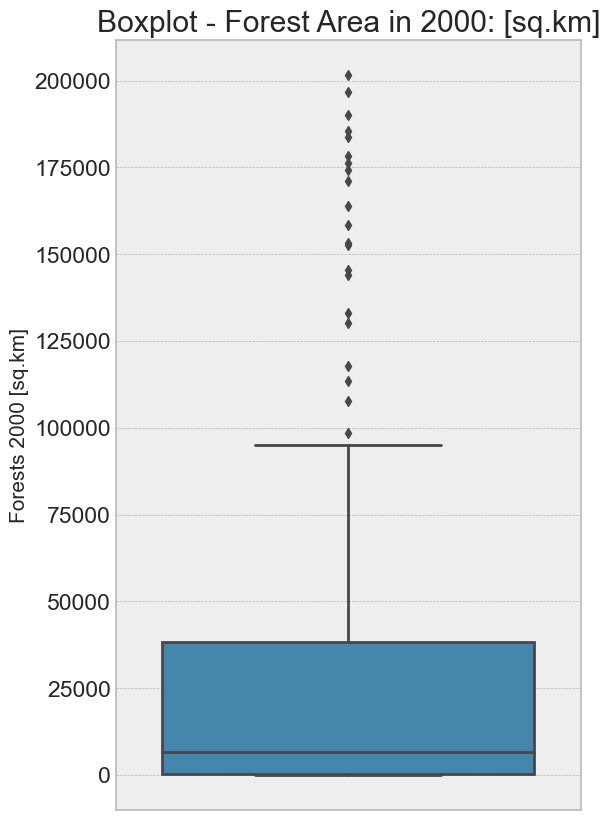

In [3182]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe_no_outliers, y= '2000_sqkm')
plt.ylabel("Forests 2000 [sq.km]")
plt.title("Boxplot - Forest Area in 2000: [sq.km]")
plt.show()

Forest Area in 2020:

In [3183]:
# Find the 75th and 25th percentiles
f_seventy_fifth_2020 = dataframe_no_outliers['2020_sqkm'].quantile(0.75)
f_twenty_fifth_2020 = dataframe_no_outliers['2020_sqkm'].quantile(0.25)

# Calculate iqr
f_iqr_2020 = f_seventy_fifth_2020 - f_twenty_fifth_2020

# Calculate the thresholds
upper_2020 = f_seventy_fifth_2020 + (1.5 * f_iqr_2020)
lower_2020 = f_twenty_fifth_2020 - (1.5 * f_iqr_2020)

# Subset the data
dataframe_no_outliers = dataframe_no_outliers[(dataframe['2020_sqkm'] > lower_2020) & (dataframe_no_outliers['2020_sqkm'] < upper_2020)]

print(dataframe_no_outliers['2020_sqkm'].describe())

count      173.000000
mean     14955.059657
std      21495.651179
min          0.000000
25%        109.980000
50%       3879.840000
75%      23377.770000
max      87630.336000
Name: 2020_sqkm, dtype: float64


C:\Users\Ana Neumann\AppData\Local\Temp\ipykernel_13192\4209058803.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe_no_outliers = dataframe_no_outliers[(dataframe['2020_sqkm'] > lower_2020) & (dataframe_no_outliers['2020_sqkm'] < upper_2020)]


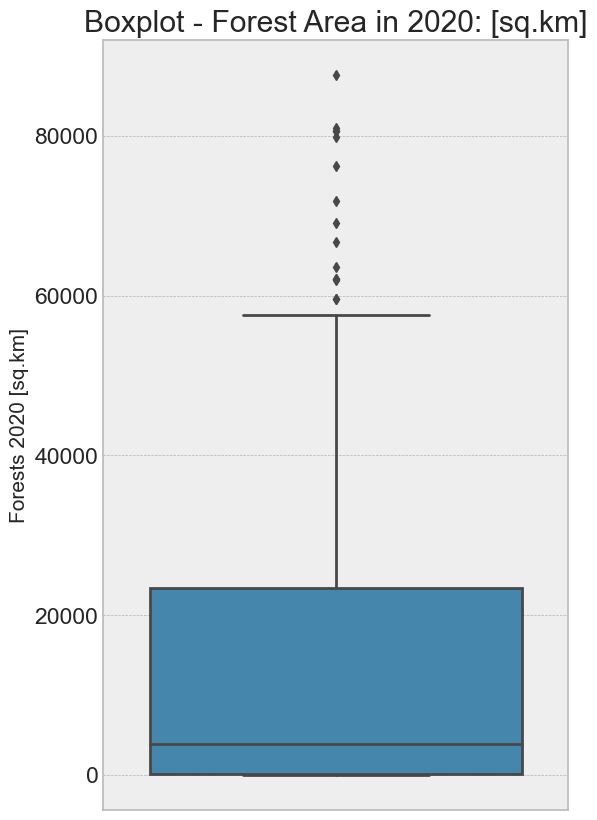

In [3184]:
# Boxplot analysis:
plt.figure(figsize=(6, 10))

sns.boxplot(data = dataframe_no_outliers, y= '2020_sqkm')
plt.ylabel("Forests 2020 [sq.km]")
plt.title("Boxplot - Forest Area in 2020: [sq.km]")
plt.show()

### Handling Outliers



In [3185]:
number_outliers = len(dataframe) - len(dataframe_no_outliers)

print("The number of outliers in the dataset is:", number_outliers, "and the total length of the dataset is:", len(dataframe))
print("After removing outliers, the remaining length of the dataset is:", len(dataframe_no_outliers), "which represents approximately",
      (len(dataframe_no_outliers) / len(dataframe)) * 100, "% of the original length.")


The number of outliers in the dataset is: 63 and the total length of the dataset is: 236
After removing outliers, the remaining length of the dataset is: 173 which represents approximately 73.30508474576271 % of the original length.


Due to the large number of outliers in relation to the dataset (approximately 40%), we will apply a logarithmic transformation to the area [sqkm] values to concentrate them in a smaller range for analysis.

## Logarithmic Transformation

Logarithmic transformation is useful when the data shows an asymmetric distribution or when the values are concentrated in a very wide range. Applying the logarithm reduces the scale of the values, making them closer together and reducing the influence of extremely high values.

In [3186]:
logarithmic_transformation = dataframe[['country', 'country_name', 'development', 'region', 'continent', '2000_sqkm', '2020_sqkm']].copy()

logarithmic_transformation['2000_sqkm'] = np.log(logarithmic_transformation['2000_sqkm'])
logarithmic_transformation['2020_sqkm'] = np.log(logarithmic_transformation['2020_sqkm'])

logarithmic_transformation.head(5)

c:\ProgramData\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,country,country_name,development,region,continent,2000_sqkm,2020_sqkm
0,AFG,Afghanistan,Developing,Southern Asia,Asia,9.424836,9.424836
1,ALB,Albania,Developed,Southern Europe,Europe,8.948898,8.973503
2,DZA,Algeria,Developing,Northern Africa,Africa,9.721497,9.855028
3,ASM,American Samoa,Developing,Polynesia,Oceania,5.178407,5.144000
4,AND,Andorra,Developed,Southern Europe,Europe,5.073923,5.073923


## Reassessing the Forest Area Distribution with Logarithmic Transformation

First, let's compare the distribution of values without transformation and with logarithmic transformation using histplot.

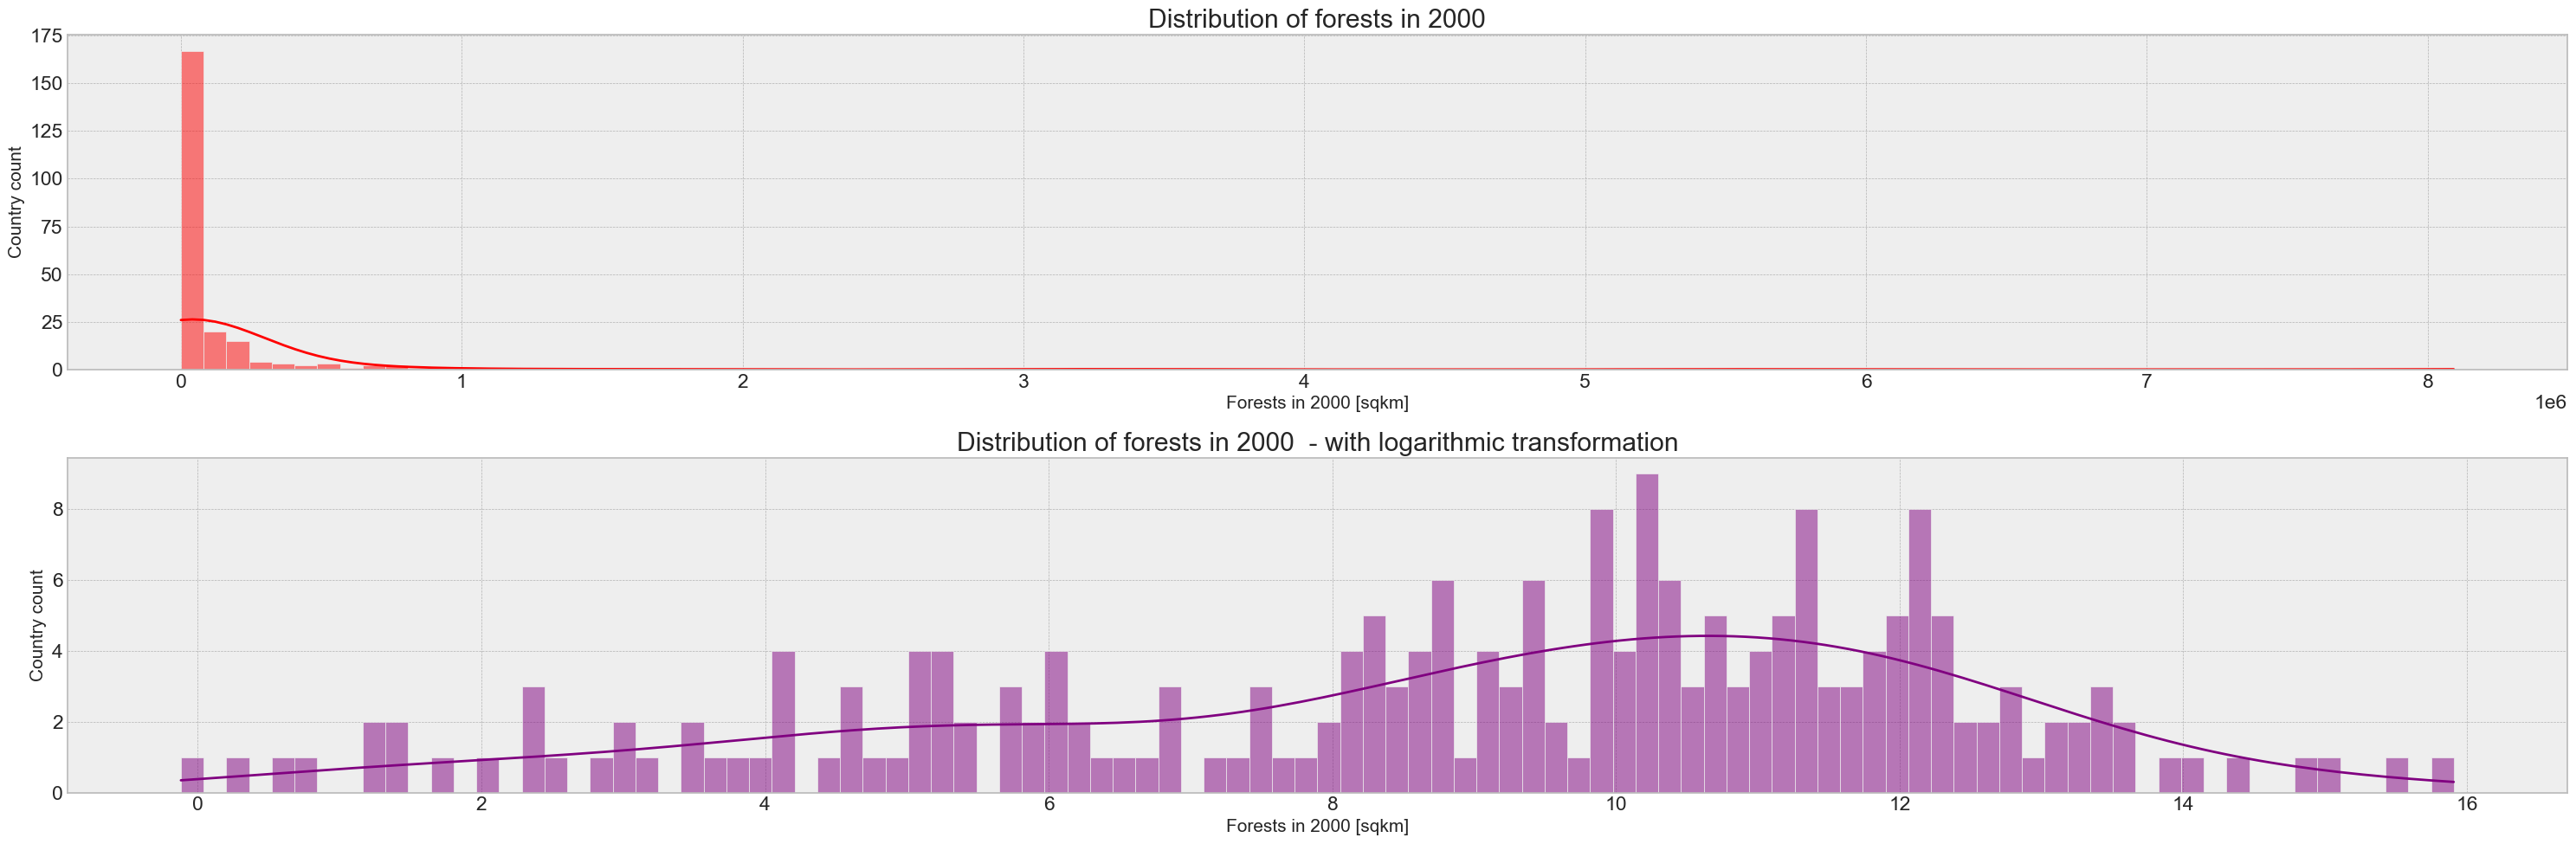

In [3187]:
fig, axes = plt.subplots(2, 1, figsize=(30, 10))

sns.histplot(data=dataframe, x="2000_sqkm", kde=True, bins=100, color="red", ax=axes[0])
axes[0].set_xlabel('Forests in 2000 [sqkm]')
axes[0].set_ylabel('Country count')
axes[0].set_title('Distribution of forests in 2000')

sns.histplot(data=logarithmic_transformation, x="2000_sqkm", kde=True, bins=100, color="purple", ax=axes[1])
axes[1].set_xlabel('Forests in 2000 [sqkm]')
axes[1].set_ylabel('Country count')
axes[1].set_title('Distribution of forests in 2000  - with logarithmic transformation')

plt.tight_layout()
plt.show()

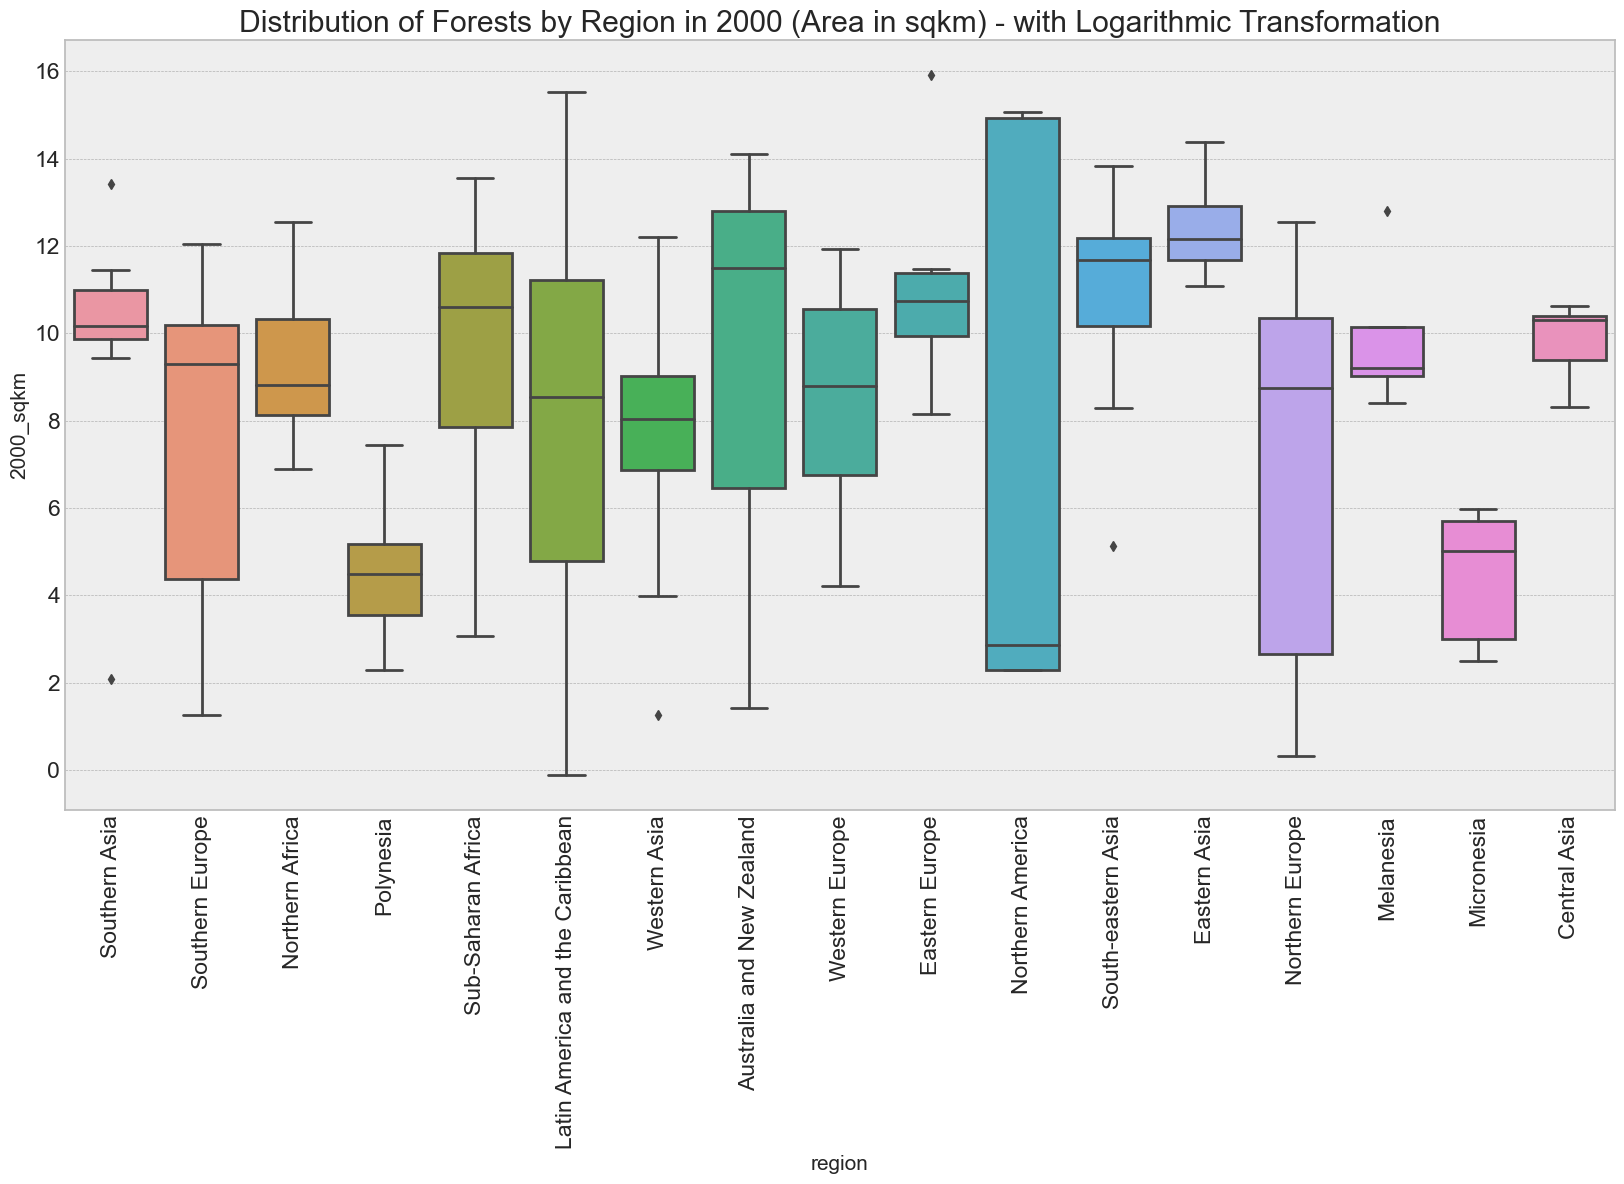

In [3188]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='region', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of Forests by Region in 2000 (Area in sqkm) - with Logarithmic Transformation")
plt.show()

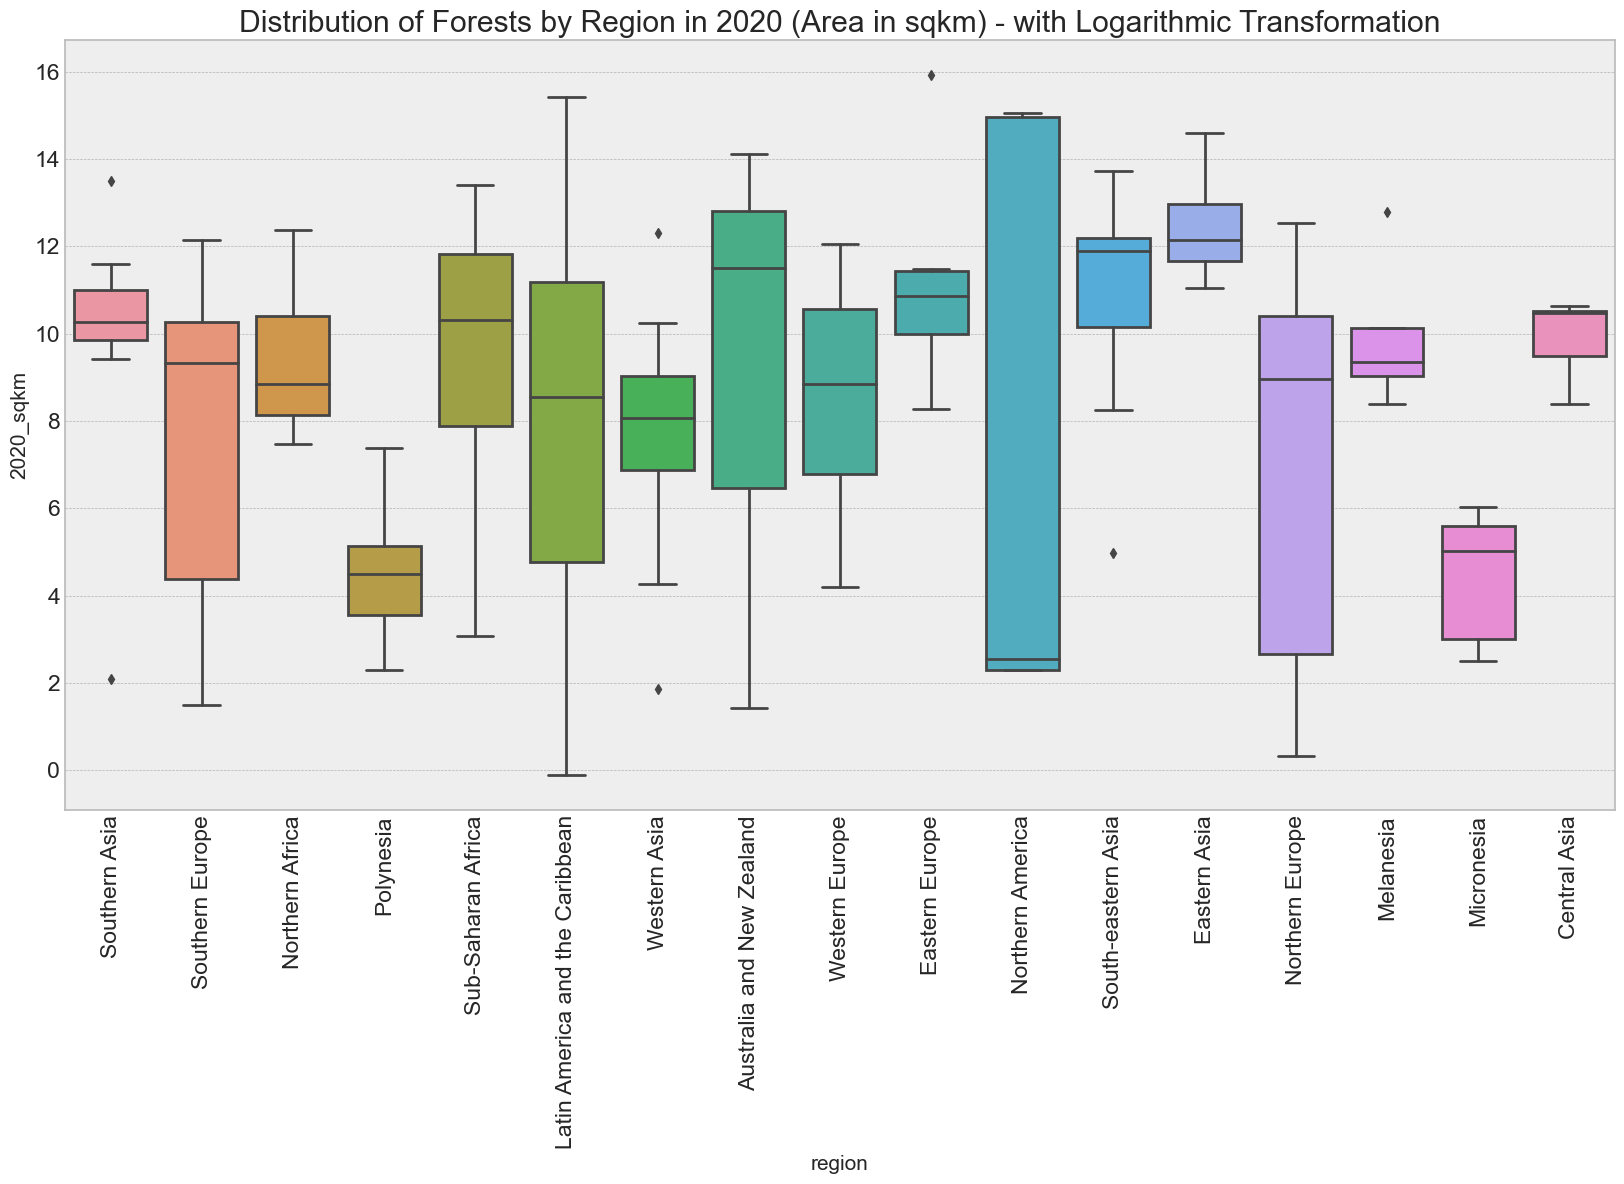

In [3189]:
# Distribuition of forests by region
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='region', y = '2020_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of Forests by Region in 2020 (Area in sqkm) - with Logarithmic Transformation")
plt.show()

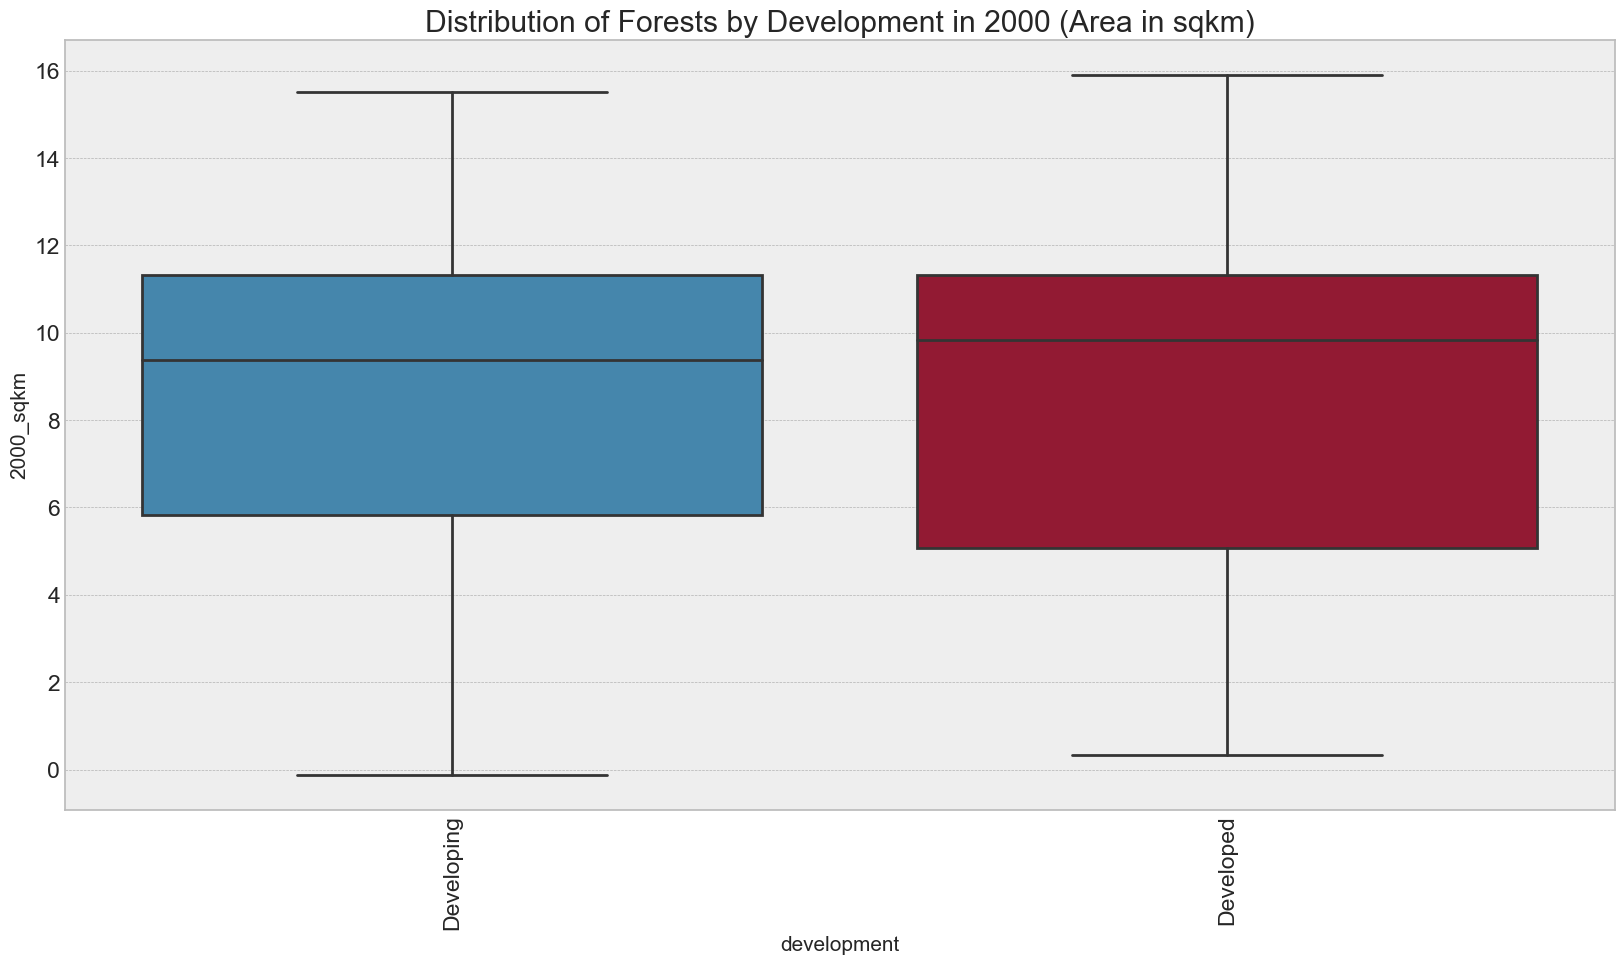

In [3190]:
# Distribuition of forests by development
plt.figure(figsize=(20, 10))
sns.boxplot(data = logarithmic_transformation, x='development', y = '2000_sqkm')
plt.xticks(rotation=90)
plt.title("Distribution of Forests by Development in 2000 (Area in sqkm)")
plt.show()